## <center>Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold

from scipy.stats import uniform, randint
from sklearn.model_selection import train_test_split,RandomizedSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_sample_weight
from lightgbm import LGBMClassifier
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

from prettytable import PrettyTable
from prettytable import ALL, FRAME

In [2]:
pd.options.display.max_seq_items = 2000
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df_train = pd.read_csv('C:/Python_Notebooks/venv/Clinical Data Analysis_n_Prediction/data/train.csv')
df_test = pd.read_csv('C:/Python_Notebooks/venv/Clinical Data Analysis_n_Prediction/data/test.csv')

## EDA

### Study of Dataset 'Train'

In [4]:
df_train.head()

Id       NA1         NA2         NA3        NA4       NA5       NA6       NA7        NA8         NB1         NB2      NB3         NB4         NB5          NB6         NB7        NC1       NC2        NC3        NC4       NC5       NC6       NC7        NC8       NC9       NC10       ND1         ND2      ND3       ND4         ND5       ND6        ND7       ND8      ND9       ND10       NE1       NE2           NE3       NE4 CE1         NE5        NE6        NE7         NF1        NF2           NF3        NF4       NF5       NF6       NF7        NG1         NG2           NG3        NG4        NG5        NG6  Class
0  000ff2bfdfe9  0.209377  3109.03329   85.200147  22.394407  8.138688  0.699861  0.025578   9.812214    5.555634  4126.58731  22.5984  175.638726  152.707705   823.928241  257.432377  47.223358  0.563481  23.387600   4.851915  0.023482  1.050225  0.069225  13.784111  1.302012  36.205956  69.08340  295.570575  0.23868  0.284232   89.245560  84.31664  29.657104  5.310690  1.74307  23.187704  7.294176  1.987283   1433.166750  0.949104   B   30.879420  78.526968   3.828384   13.394640  10.265073   9028.291921   3.583450  7.298162   1.73855  0.094822  11.339138   72.611063   2003.810319  22.136229  69.834944   0.120343      1
1  007255e47698  0.145282   978.76416   85.200147  36.968889  8.138688  3.632190  0.025578  13.517790    1.229900  5496.92824  19.4205  155.868030   14.754720    51.216883  257.432377  30.284345  0.484710  50.628208   6.085041  0.031442  1.113875  1.117800  28.310953  1.357182  37.476568  70.79836  178.553100  0.23868  0.363489  110.581815  75.74548  37.532000  0.005518  1.74307  17.222328  4.926396  0.858603   1111.287150  0.003042   A  109.125159  95.415086  52.260480   17.175984   0.296850   6785.003474  10.358927  0.173229   0.49706  0.568932   9.292698   72.611063  27981.562750  29.135430  32.131996  21.978000      0
2  013f2bd269f5  0.470030  2635.10654   85.200147  32.360553  8.138688  6.732840  0.025578  12.824570    1.229900  5135.78024  26.4825  128.988531  219.320160   482.141594  257.432377  32.563713  0.495852  85.955376   5.376488  0.036218  1.050225  0.700350  39.364743  1.009611  21.459644  70.81970  321.426625  0.23868  0.210441  120.056438  65.46984  28.053464  1.289739  1.74307  36.861352  7.813674  8.146651   1494.076488  0.377208   B  109.125159  78.526968   5.390628  224.207424   8.745201   8338.906181  11.626917  7.709560   0.97556  1.198821  37.077772   88.609437  13676.957810  28.022851  35.192676   0.196941      0
3  043ac50845d5  0.252107  3819.65177  120.201618  77.112203  8.138688  3.685344  0.025578  11.053708    1.229900  4169.67738  23.6577  237.282264   11.050410   661.518640  257.432377  15.201914  0.717882  88.159360   2.347652  0.029054  1.400300  0.636075  41.116960  0.722727  21.530392  47.27586  196.607985  0.23868  0.292431  139.824570  71.57120  24.354856  2.655345  1.74307  52.003884  7.386060  3.813326  15691.552180  0.614484   B   31.674357  78.526968  31.323372   59.301984   7.884336  10965.766040  14.852022  6.122162   0.49706  0.284466  18.529584   82.416803   2094.262452  39.948656  90.493248   0.155829      0
4  044fb8a146ec  0.380297  3733.04844   85.200147  14.103738  8.138688  3.942255  0.054810   3.396778  102.151980  5728.73412  24.0108  324.546318  149.717165  6074.859475  257.432377  82.213495  0.536467  72.644264  30.537722  0.025472  1.050225  0.693150  31.724726  0.827550  34.415360  74.06532  200.178160  0.23868  0.207708   97.920120  52.83888  26.019912  1.144902  1.74307   9.064856  7.350720  3.490846   1403.656300  0.164268   B  109.125159  91.994825  51.141336   29.102640   4.274640  16198.049590  13.666727  8.153058  48.50134  0.121914  16.408728  146.109943   8524.370502  45.381316  36.262628   0.096614      1

* Shape of dataset 'Train'

In [5]:
df_train.shape

(617, 58)

### EDA on Merged Dataset

In [6]:
df_train.columns

Index(['Id', 'NA1', 'NA2', 'NA3', 'NA4', 'NA5', 'NA6', 'NA7', 'NA8', 'NB1', 'NB2', 'NB3', 'NB4', 'NB5', 'NB6', 'NB7', 'NC1', 'NC2', 'NC3', 'NC4', 'NC5', 'NC6', 'NC7', 'NC8', 'NC9', 'NC10', 'ND1', 'ND2', 'ND3', 'ND4', 'ND5', 'ND6', 'ND7', 'ND8', 'ND9', 'ND10', 'NE1', 'NE2', 'NE3', 'NE4', 'CE1', 'NE5', 'NE6', 'NE7', 'NF1', 'NF2', 'NF3', 'NF4', 'NF5', 'NF6', 'NF7', 'NG1', 'NG2', 'NG3', 'NG4', 'NG5', 'NG6', 'Class'], dtype='object')

In [7]:
df_train.drop(['Id', 'Class'], axis=1).dtypes.value_counts()

float64    55
object      1
Name: count, dtype: int64

In [8]:
df_train.describe(percentiles=[.5,.75,.95,.99]).T

count          mean           std          min          50%           75%           95%            99%            max
NA1    617.0      0.477149      0.468388     0.081187     0.354659      0.559763      1.079360       2.164873       6.161666
NA2    617.0   3502.013221   2300.322717   192.593280  3120.318960   4361.637390   6957.807340   10377.993534   28688.187660
NA3    617.0    118.624513    127.838950    85.200147    85.200147    113.739540    209.993150     541.428776    1910.123198
NA4    617.0     38.968552     69.728226     3.177522    20.533110     39.139886    111.939207     410.511686     630.518230
NA5    617.0     10.128242     10.518877     8.138688     8.138688      8.138688     17.119562      34.467239     178.943634
NA6    617.0      5.545576      2.551696     0.699861     5.031912      6.431634      9.247024      13.169435      38.270880
NA7    617.0      0.060320      0.416817     0.025578     0.025578      0.036845      0.123992       0.214405      10.315851
NA8    617.0     10.566447      4.350645     3.396778    10.461320     12.969516     16.861631      22.914324      38.971568
NB1    617.0      8.053012     65.166943     1.229900     1.229900      5.081244     11.996796      50.660495    1463.693448
NB2    617.0   5350.388655   3021.326641  1693.624320  4997.960730   6035.885700   7955.457632   10131.207181   53060.599240
NB3    617.0     21.419492      3.478278     9.886800    21.186000     23.657700     27.188700      28.248000      29.307300
NB4    617.0    231.322223    183.992505    72.948951   193.908816    247.803462    392.890867     995.177822    2447.810550
NB5    557.0     98.328737     96.479371     1.331155    61.642115    134.009015    344.644105     344.644105     344.644105
NB6    617.0   1218.133238   7575.293707    51.216883   627.417402    975.649259   2096.116417    5138.893834  179250.252900
NB7    617.0    550.632525   2076.371275   257.432377   257.432377    257.432377   1516.081741    2983.909004   50092.459300
NC1    615.0     77.104151    159.049302    12.499760    42.554330     77.310097    212.254197     652.221209    2271.436167
NC2    614.0      0.688801      0.263994     0.176874     0.658715      0.772206      1.021267       1.480183       4.103032
NC3    617.0     90.251735     51.585130    23.387600    79.819104     99.813520    171.576190     275.576963     633.534408
NC4    617.0     11.241064     13.571133     0.510888     9.123000     13.565901     28.317184      42.045961     200.967526
NC5    617.0      0.030615      0.014808     0.003184     0.027860      0.034427      0.048317       0.075254       0.224074
NC6    617.0      1.403761      1.922210     1.050225     1.050225      1.228445      1.889132       5.685727      31.688153
NC7    617.0      0.742262      0.281195     0.069225     0.730800      0.859350      1.114320       1.626096       3.039675
NC8    617.0     36.917590     17.266347    13.784111    34.835130     40.529401     56.506835      73.682542     267.942823
NC9    617.0      1.383792      0.538717     0.137925     1.351665      1.660617      2.245419       3.095037       4.951507
NC10   617.0     27.165653     14.645993     7.030640    36.019104     37.935832     43.382011      54.468456      64.521624
ND1    617.0     51.128326     21.210888     6.906400    49.180940     61.408760     87.653080     110.783622     210.330920
ND2    617.0    401.901299    317.745623    35.998895   307.509595    507.896200   1079.516254    1612.415033    2103.405190
ND3    617.0      0.633884      1.912384     0.238680     0.238680      0.238680      2.038327       5.744606      37.895013
ND4    617.0      0.367002      0.112989     0.040995     0.358023      0.426348      0.560265       0.658216       1.060404
ND5    617.0    146.972099     86.084419    60.232470   130.050630    165.836955    267.653097     513.874534    1049.168078
ND6    617.0     94.795377     28.243187    10.345600    96.264960    110.640680    130.016208     173.410403     326.236200
ND7    

> Observations
* No null value observed
* We observe Right Skewness in almost all the features
* We shall check for outliers and skewness in detailed analysis

#### Missing Data Check

In [9]:
df_train.isna().sum().sort_values(ascending=False)[:10]

NE5    60
NB5    60
NC2     3
NF7     2
NC1     2
NF5     1
NF1     1
ND8     1
NG6     1
NE2     0
dtype: int64

<Axes: >

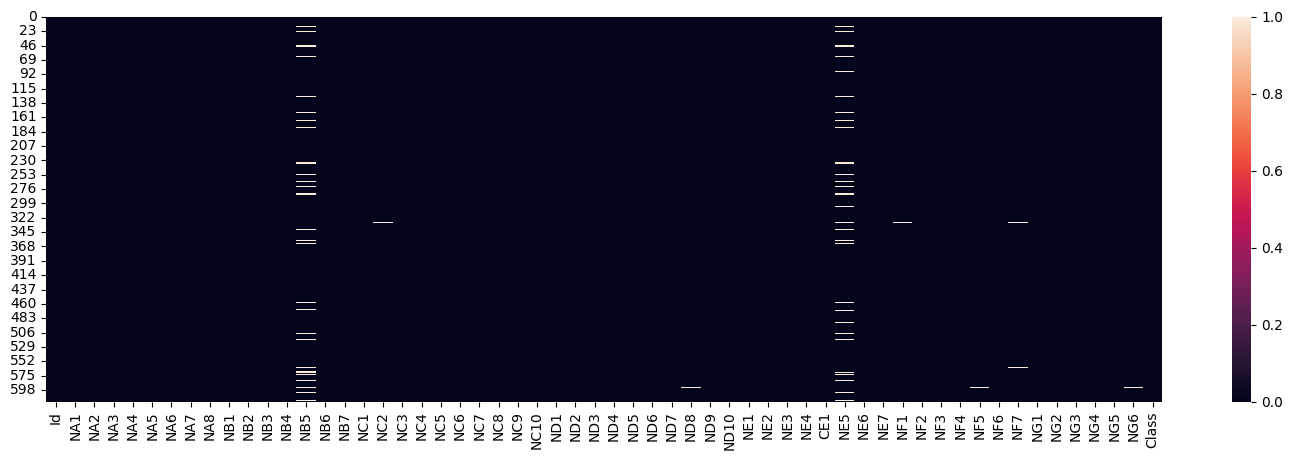

In [10]:
plt.figure(figsize=(18,5))
sns.heatmap(df_train.isnull())

**NOTE** - We shall do treatment for Missing data only after train-test split to avoid any information leakage from test subset to the model

In [11]:
cat_cols = ['CE1']
num_cols = [x for x in df_train.columns if x not in ['Class','Id','CE1']]

* Study of the target variable 'Class'

In [12]:
df_train.Class.value_counts().index

Index([0, 1], dtype='int64', name='Class')

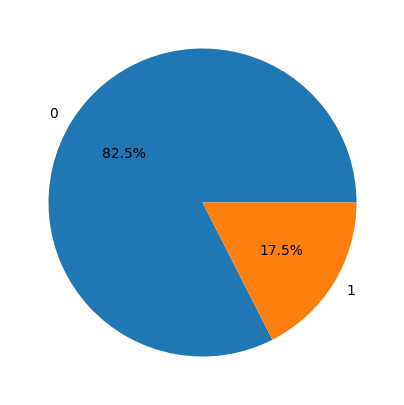

In [13]:
plt.figure(figsize = (5,5))
plt.pie(df_train.Class.value_counts(), labels = df_train.Class.value_counts().index,autopct='%1.1f%%')

plt.show()

### Study of Categorical Features

In [14]:
print(f'Uniq values for column CE1 : {df_train.CE1.nunique()} | {df_train.CE1.unique()}')

Uniq values for column CE1 : 2 | ['B' 'A']


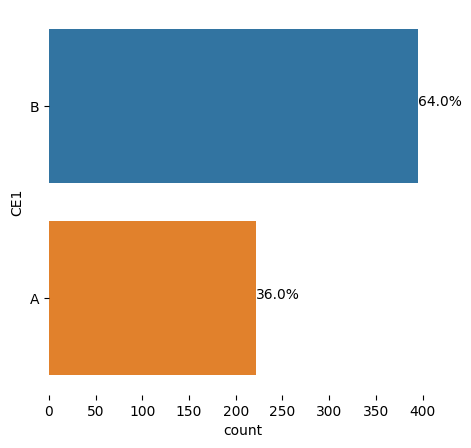

In [15]:
fig= plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, frameon=False)

ax = sns.countplot(data = df_train, y = 'CE1')
total = float(len(df_train.CE1))

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x,y/2+p.get_xy()[1]))

plt.show()

#### Study of Numeric/ Continous Features

In [16]:
df_num = df_train[num_cols]

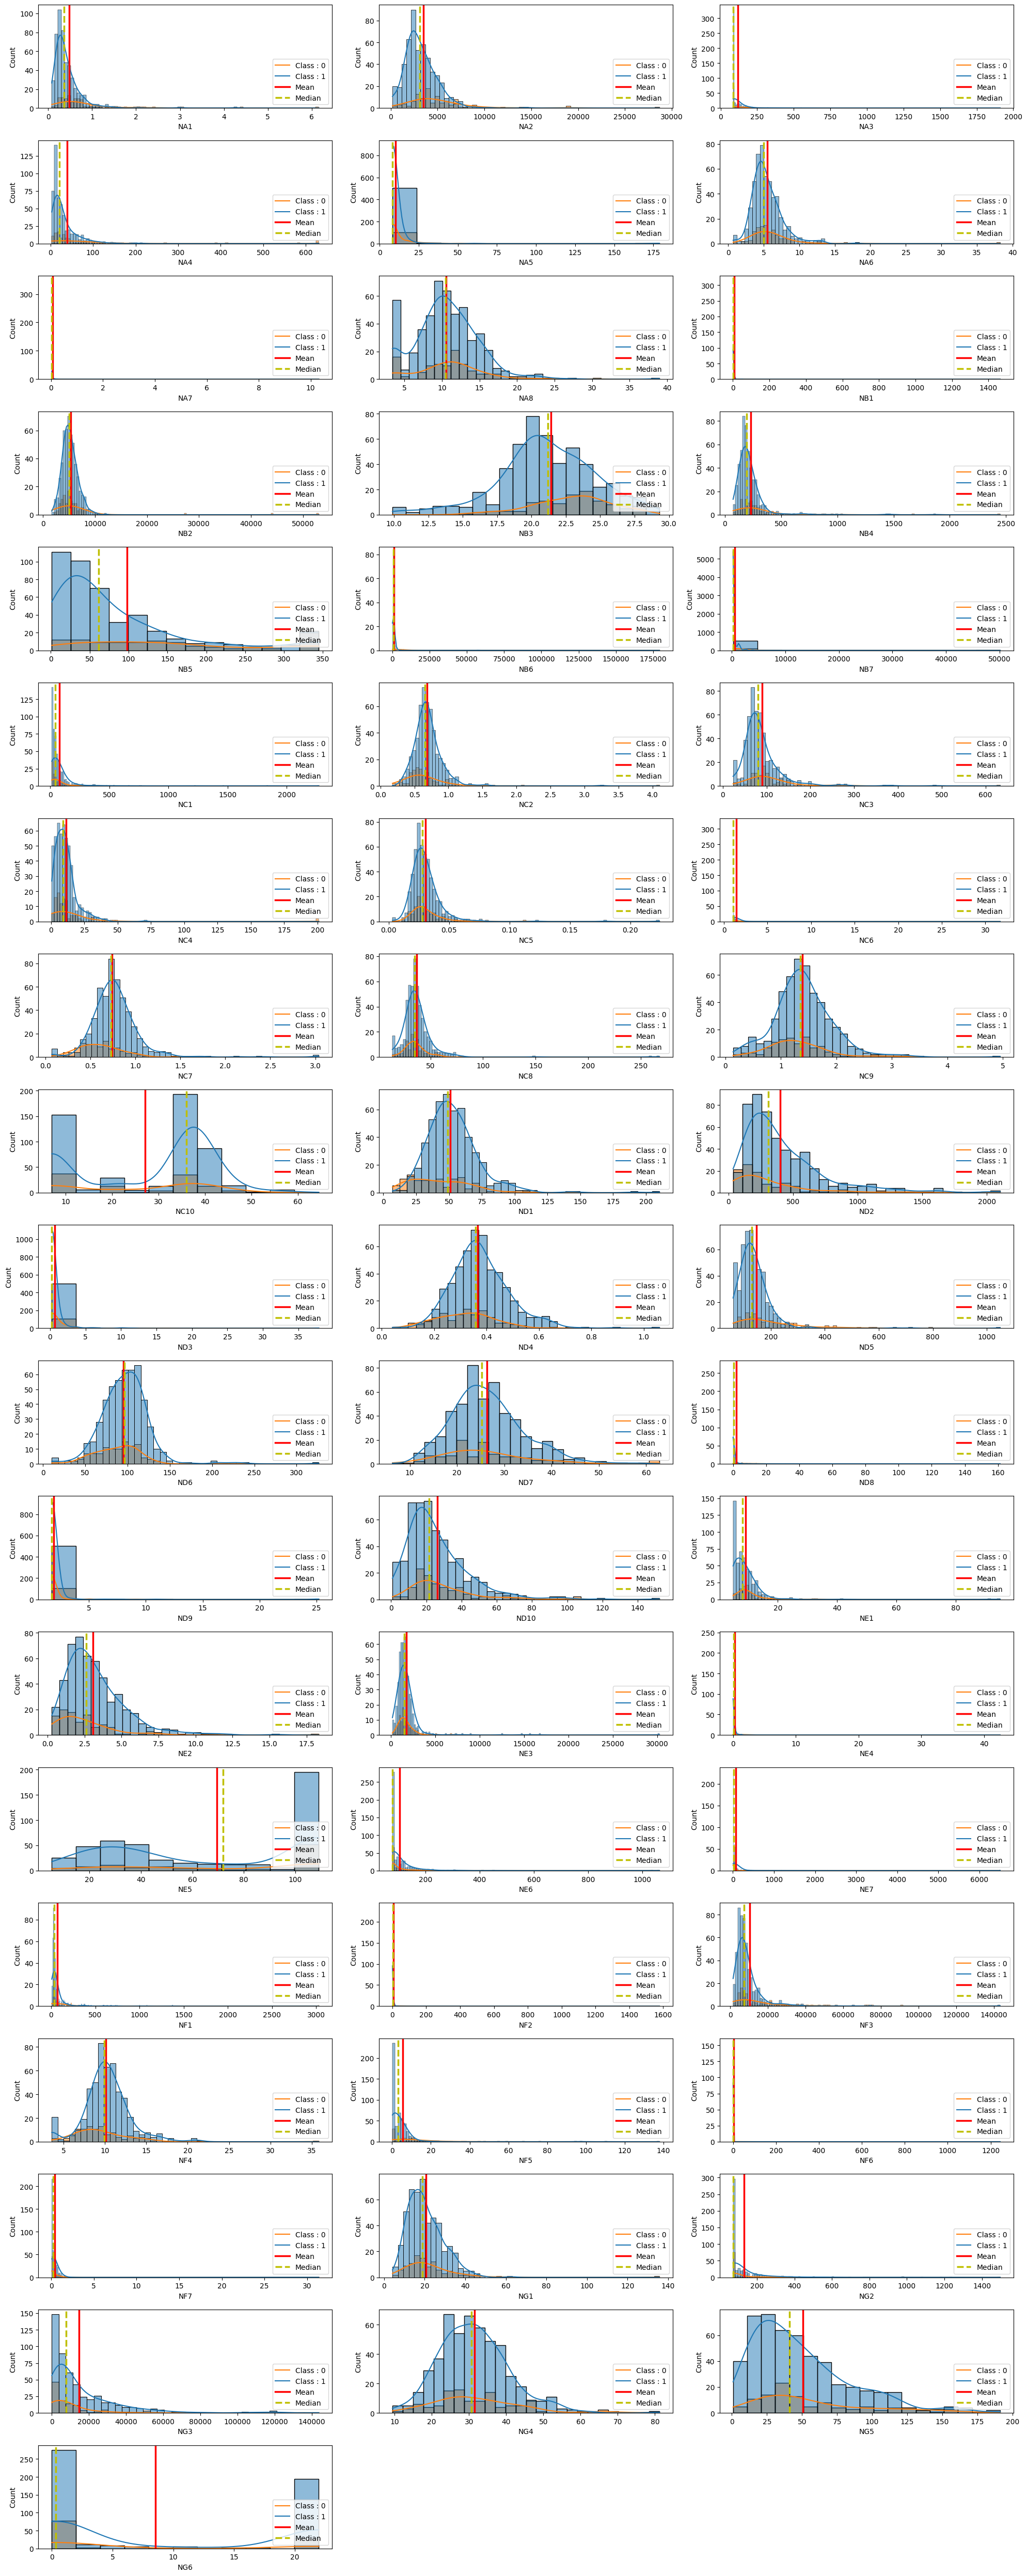

In [17]:
#fig, axes = plt.subplots(nrows=11, ncols=2, sharey = False, figsize = (20,20))
fig = plt.figure(figsize = (20,50))


for i in range(len(num_cols)):
    ax = fig.add_subplot(19, 3, i+1)
    sns.histplot(x = num_cols[i], data = df_train, hue = 'Class', kde=True, legend=False, ax = ax)
    plt.axvline(df_train[num_cols[i]].mean(), c='r', ls='-', lw=2.5, label = 'Mean')
    plt.axvline(df_train[num_cols[i]].median(), c='y', ls='--', lw=2.5, label = 'Median')
    labels = ['Class : 0','Class : 1','Mean','Median']
    plt.legend(labels,loc = 'lower right')
plt.subplots_adjust(top=0.9)
plt.tight_layout()
plt.show()

> Observations
- Check required to be done after log transformation as no data observed for features - **NA7** and **NB1**<br>
- Spike observed at beginning for feature - **NA8**<br>
- Different spikes for Class 0 & 1 observed for feature - **NB3**<br>
- Uniform distribution observed for Class 0 only (not Class 1) for feature - **NB5**<br>
- Multiple peaks observed in the distributions for the features : **NC10**, **NE5**, **NG6**<br>

> Action
- Detailed analysis to study above observations in the following steps

### Detailed Analysis by Features

* Helper Function for Plotting and Analysis

In [18]:
def analysis_feature(feature, data, only_plot = False):

    ## Random Samples of size=100 for each 'Class'

    random_1 = data[data.Class == 1].sample(n=100)
    random_0 = data[data.Class == 0].sample(n=100)
    
    fig = plt.figure(figsize=(12,3))
    ax = fig.add_subplot(1,2,1)
    ax.set_title('Plot for Random sample of size 100 for each Class')
    sns.histplot(x = feature, data = random_0, bins = 10, kde=True, color='orange', ax= ax)
    sns.histplot(x = feature, data = random_1, bins = 10, kde=True, color='b',ax= ax)
    plt.xticks([])
    ax2 = fig.add_subplot(1,2,2)
    ax2.set_title('Plot for Complete dataset')
    sns.histplot(x = feature, data = data, bins = 10, kde=True, hue = 'Class', ax=ax2)
    ax.legend(labels = ['0','1'], loc = 'upper right')
    plt.xticks([])
    
    plt.show()

    if(not only_plot):

        print('-'*70,'\n')
        print('Analysis for Random sample of size 100 for each Class')
        print('-'*70,'\n')
        # print('Class = 0 ','\n',random_0[feature].value_counts(bins = 10).sort_index(),'\n',
        #     'Class = 1 ','\n',random_1[feature].value_counts(bins = 10).sort_index(),'\n')


        res_random = pd.concat([random_0[feature].value_counts(bins = 10).sort_index().reset_index().round(),random_1[feature].value_counts(bins = 10).sort_index().reset_index()], axis = 1)
        res_random.columns = ['Bins_Class_0','Count_Class_0','Bins_Class_1','Count_Class_1']
        print(res_random)
        
        print('-'*70,'\n')
        print('Analysis for Complete dataset','\n' ,)
        print('-'*70,'\n')  

        res_all = pd.concat([data[data.Class==0][feature].value_counts(bins = 10).sort_index().reset_index(),data[data.Class==1][feature].value_counts(bins = 10).sort_index().reset_index()], axis = 1)
        res_all.columns = ['Bins_Class_0','Count_Class_0','Bins_Class_1','Count_Class_1']
        print(res_all)

        # print('Class = 0: ','\n',df[df.Class==0][feature].value_counts(bins = 10).sort_index(),'\n' ,
        #     'Class = 1: ','\n',df[df.Class==1][feature].value_counts(bins = 10).sort_index(),'\n')
        
        print('-'*70,'\n')
        print(f'Value Counts for feature {feature} \n')  
        print('-'*70,'\n')
        res_freq = pd.concat([pd.concat([data[data.Class==0][feature].value_counts().sort_index().head(5),data[data.Class==0][feature].value_counts().sort_index().tail(5)]).reset_index(),
                            pd.concat([data[data.Class==1][feature].value_counts().sort_index().head(5),data[data.Class==1][feature].value_counts().sort_index().tail(5)]).reset_index()], axis=1)
        res_freq.columns = ['Bins_Class_0','Count_Class_0','Bins_Class_1','Count_Class_1']
        print(res_freq)

In [19]:
# ## Random Samples of size=100 for each 'Class'

# random_1 = df[df.Class == 1].sample(n=100)
# random_0 = df[df.Class == 0].sample(n=100)

#### Analysis for BQ

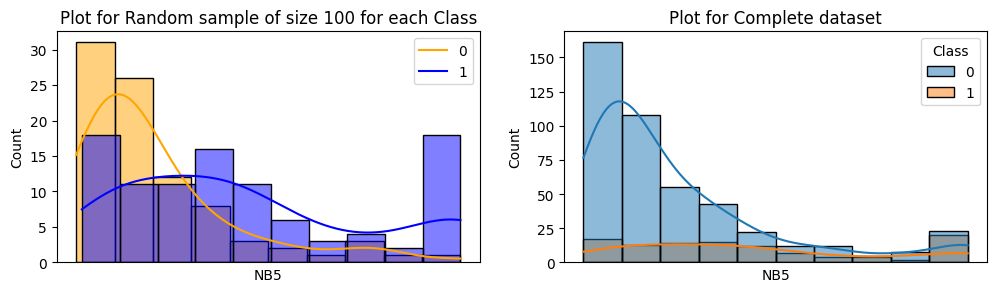

---------------------------------------------------------------------- 

Analysis for Random sample of size 100 for each Class
---------------------------------------------------------------------- 

         Bins_Class_0  Count_Class_0        Bins_Class_1  Count_Class_1
0     (2.027, 36.598]             31     (7.104, 41.163]             18
1    (36.598, 70.825]             26    (41.163, 74.883]             11
2   (70.825, 105.053]             12   (74.883, 108.603]             11
3   (105.053, 139.28]              8  (108.603, 142.323]             16
4   (139.28, 173.507]              3  (142.323, 176.043]             11
5  (173.507, 207.735]              2  (176.043, 209.763]              6
6  (207.735, 241.962]              1  (209.763, 243.484]              3
7  (241.962, 276.189]              3  (243.484, 277.204]              4
8  (276.189, 310.417]              1  (277.204, 310.924]              2
9  (310.417, 344.644]              1  (310.924, 344.644]             18
--------

In [20]:
analysis_feature('NB5', df_train)

> Observation :
- 'Class' = 1 is observed to be almost uniformly distributed for the overall range of values of 'BQ'. However, a dip is observed for 'BQ' range between 200 and 300.
- Max value for the feature 'BQ' is trimmed at 344.644105

#### Analysis for 'CR'

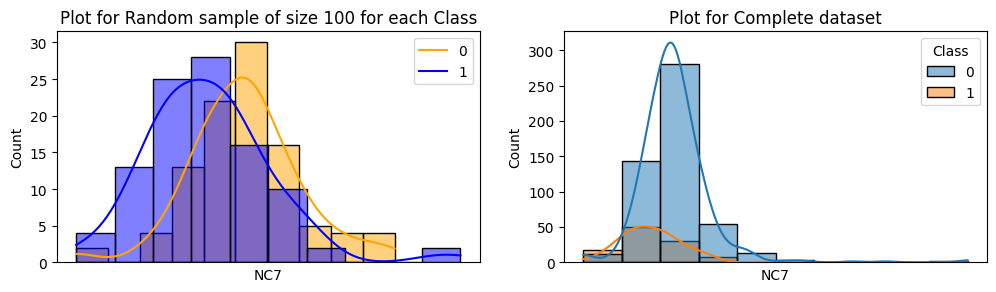

---------------------------------------------------------------------- 

Analysis for Random sample of size 100 for each Class
---------------------------------------------------------------------- 

      Bins_Class_0  Count_Class_0     Bins_Class_1  Count_Class_1
0  (0.0669, 0.199]              2  (0.0667, 0.226]              4
1   (0.199, 0.329]              0   (0.226, 0.382]             13
2   (0.329, 0.458]              4   (0.382, 0.539]             25
3   (0.458, 0.588]             13   (0.539, 0.695]             28
4   (0.588, 0.718]             22   (0.695, 0.852]             16
5   (0.718, 0.848]             30   (0.852, 1.008]             10
6   (0.848, 0.977]             16   (1.008, 1.165]              2
7   (0.977, 1.107]              5   (1.165, 1.321]              0
8   (1.107, 1.237]              4   (1.321, 1.478]              0
9   (1.237, 1.366]              4   (1.478, 1.634]              2
---------------------------------------------------------------------- 

A

In [21]:
analysis_feature('NC7', df_train)

> Observations:
- Looks good
- There are outliers for Class 0. But seems like a valid data

#### Analysis for 'CW'

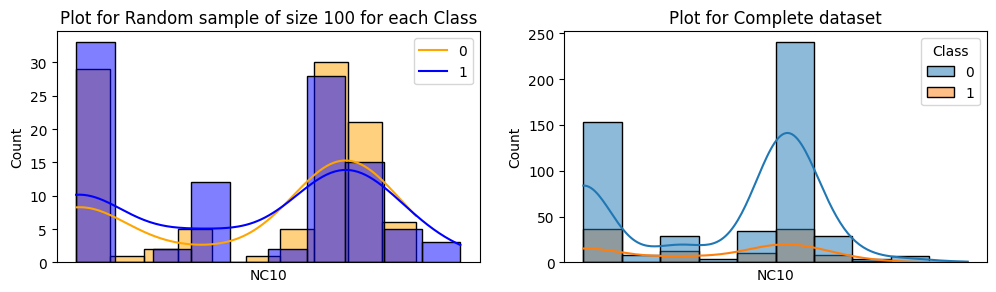

---------------------------------------------------------------------- 

Analysis for Random sample of size 100 for each Class
---------------------------------------------------------------------- 

       Bins_Class_0  Count_Class_0      Bins_Class_1  Count_Class_1
0   (6.991, 10.878]             29   (6.986, 11.385]             33
1  (10.878, 14.726]              1   (11.385, 15.74]              0
2  (14.726, 18.574]              2   (15.74, 20.095]              2
3  (18.574, 22.421]              5   (20.095, 24.45]             12
4  (22.421, 26.269]              0   (24.45, 28.805]              0
5  (26.269, 30.117]              1   (28.805, 33.16]              2
6  (30.117, 33.964]              5   (33.16, 37.515]             28
7  (33.964, 37.812]             30  (37.515, 41.869]             15
8   (37.812, 41.66]             21  (41.869, 46.224]              5
9   (41.66, 45.507]              6  (46.224, 50.579]              3
----------------------------------------------------

In [22]:
analysis_feature('NC10', df_train)

> Observations:
- Distribution peaks at 2 points for both class 0 and 1 at (5.0, 10.0] and (35.0, 40.0]. <br>
This could be because of these ranges of value for the parameter CW are most frequent. <br>
- The minimum value for CW are trimmed at 7.030640.

#### Analysis for Feature AY

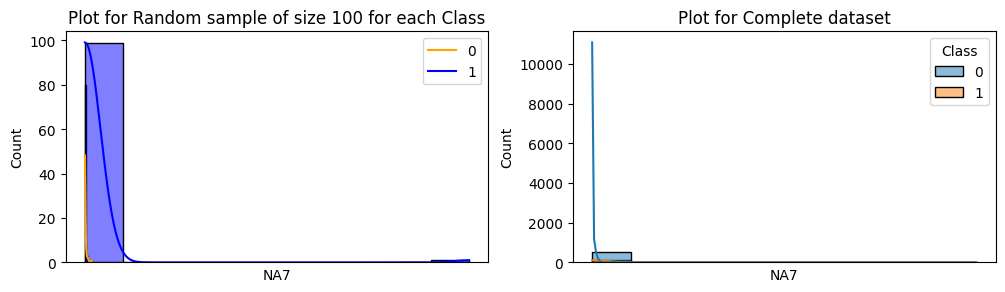

---------------------------------------------------------------------- 

Analysis for Random sample of size 100 for each Class
---------------------------------------------------------------------- 

                     Bins_Class_0  Count_Class_0     Bins_Class_1  Count_Class_1
0  (0.024399999999999998, 0.0448]             80  (0.0143, 1.055]             99
1                 (0.0448, 0.064]              9   (1.055, 2.084]              0
2                 (0.064, 0.0832]              4   (2.084, 3.113]              0
3                 (0.0832, 0.102]              1   (3.113, 4.142]              0
4                  (0.102, 0.122]              3   (4.142, 5.171]              0
5                  (0.122, 0.141]              1     (5.171, 6.2]              0
6                   (0.141, 0.16]              0     (6.2, 7.229]              0
7                   (0.16, 0.179]              0   (7.229, 8.258]              0
8                  (0.179, 0.199]              1   (8.258, 9.287]      

In [23]:
analysis_feature('NA7', df_train)

> Observations
- Most of the records lie between the range [0,2]. Apart from this, there are very few records for higher range > 9, which is only for Class 1. This could be an outlier.
- Take log and check the distribution

#### Analysis for feature BC

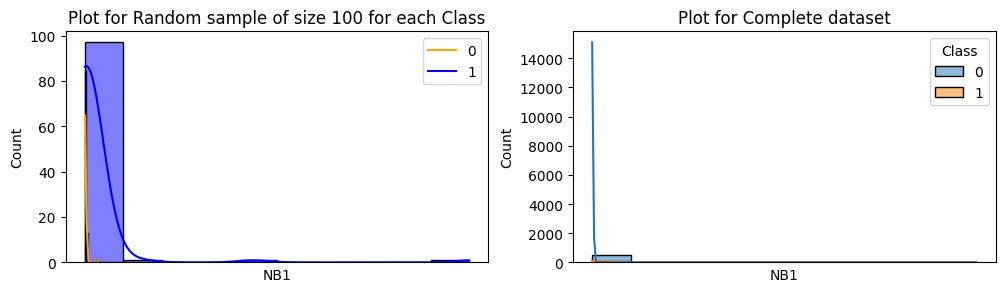

---------------------------------------------------------------------- 

Analysis for Random sample of size 100 for each Class
---------------------------------------------------------------------- 

                  Bins_Class_0  Count_Class_0          Bins_Class_1  Count_Class_1
0  (1.1760000000000002, 6.522]             85     (-0.234, 147.476]             97
1              (6.522, 11.814]             13    (147.476, 293.723]              1
2             (11.814, 17.106]              1    (293.723, 439.969]              0
3             (17.106, 22.398]              0    (439.969, 586.215]              0
4              (22.398, 27.69]              0    (586.215, 732.462]              1
5              (27.69, 32.982]              0    (732.462, 878.708]              0
6             (32.982, 38.274]              0   (878.708, 1024.954]              0
7             (38.274, 43.567]              0  (1024.954, 1171.201]              0
8             (43.567, 48.859]              0  (1171.

In [24]:
analysis_feature('NB1', df_train)

* Histogram of data for the feature - 'BC'

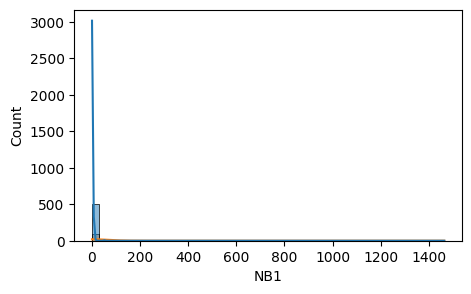

In [25]:
plt.figure(figsize = (5,3))
sns.histplot(x = 'NB1', data = df_train,bins = 50, hue = 'Class', kde=True, legend=False)
plt.show()

* Histogram of data for the feature - 'BC' at the lower range ( BC < 50)

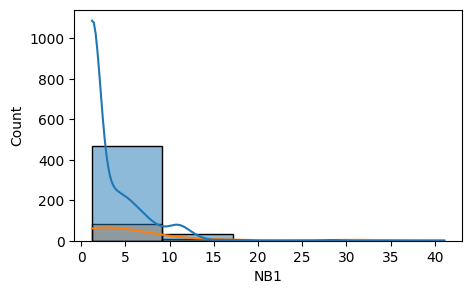

In [26]:
plt.figure(figsize = (5,3))
sns.histplot(x = 'NB1', data = df_train[(df_train.NB1 < 50)],bins = 5, hue = 'Class', kde=True, legend=False)
plt.show()

In [27]:
print(pd.concat([df_train.NB1.value_counts().sort_values(ascending=False).head(5),df_train.NB1.value_counts().sort_values(ascending=False).tail(5)]))

NB1
1.229900     349
3.795120       2
3.239908       2
2.094344       2
4.188688       2
5.882436       1
11.188576      1
3.777550       1
6.465760       1
7.948668       1
Name: count, dtype: int64


In [28]:
print(pd.concat([df_train.NB1.value_counts().sort_index(ascending=False).head(5),df_train.NB1.value_counts().sort_index(ascending=False).tail(5)]))

NB1
1463.693448      1
643.553960       1
212.628626       1
119.908222       1
102.151980       1
2.125970         1
2.094344         2
2.052176         1
1.995952         1
1.229900       349
Name: count, dtype: int64


> Observations:
- All the values seem to be unique. However, the values are trimmed for minimum at 1.2299000.
- There are some extreme values like 1463 and 643. These do appear to be outliers, however, given that for these Class = 1, this may not be erroneous.

#### Analysis for feature 'AZ'

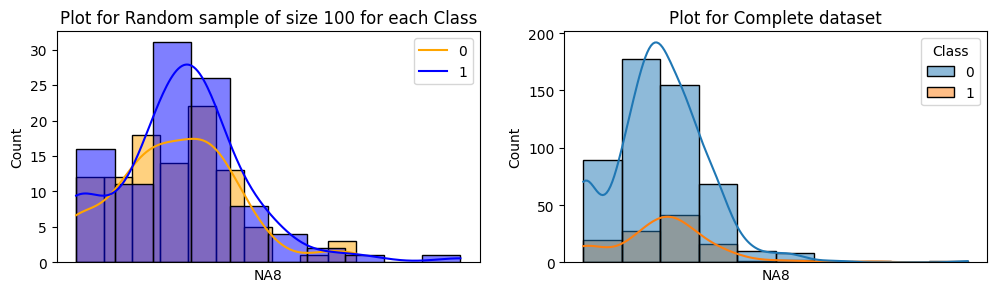

---------------------------------------------------------------------- 

Analysis for Random sample of size 100 for each Class
---------------------------------------------------------------------- 

       Bins_Class_0  Count_Class_0      Bins_Class_1  Count_Class_1
0    (3.376, 5.349]             12    (3.369, 6.076]             16
1    (5.349, 7.301]             12    (6.076, 8.756]             11
2    (7.301, 9.254]             18   (8.756, 11.436]             31
3   (9.254, 11.206]             14  (11.436, 14.115]             26
4  (11.206, 13.159]             22  (14.115, 16.795]              8
5  (13.159, 15.111]             13  (16.795, 19.474]              4
6  (15.111, 17.063]              5  (19.474, 22.154]              2
7  (17.063, 19.016]              0  (22.154, 24.834]              1
8  (19.016, 20.968]              1  (24.834, 27.513]              0
9   (20.968, 22.92]              3  (27.513, 30.193]              1
----------------------------------------------------

In [29]:
analysis_feature('NA8', df_train)

> Observations:
- The minimum appears to be trimmed at 3.396778. This is why there is a spike at the beginning of the histogram.
- Other observations are normal

#### Analysis for feature - 'BN'

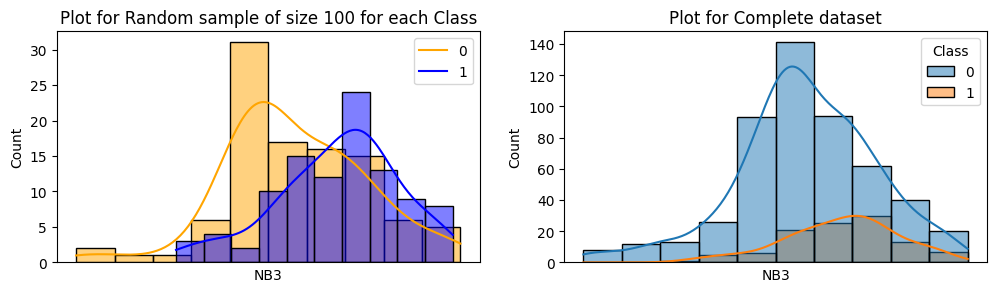

---------------------------------------------------------------------- 

Analysis for Random sample of size 100 for each Class
---------------------------------------------------------------------- 

                   Bins_Class_0  Count_Class_0      Bins_Class_1  Count_Class_1
0  (10.927000000000001, 12.712]              2  (15.523, 16.808]              3
1              (12.712, 14.477]              1  (16.808, 18.079]              4
2              (14.477, 16.243]              2   (18.079, 19.35]              2
3              (16.243, 18.008]              9   (19.35, 20.621]             10
4              (18.008, 19.774]             27  (20.621, 21.892]             15
5              (19.774, 21.539]             17  (21.892, 23.163]             12
6              (21.539, 23.305]             21  (23.163, 24.435]             24
7               (23.305, 25.07]             11  (24.435, 25.706]             13
8               (25.07, 26.836]              5  (25.706, 26.977]              9


In [30]:
analysis_feature('NB3', df_train)

> Observations
- No specific observation

### Analysis for features - CW, EL, GL

---------------------------------------------------------------------------------------------------- 

Analysis for NC10 

---------------------------------------------------------------------------------------------------- 



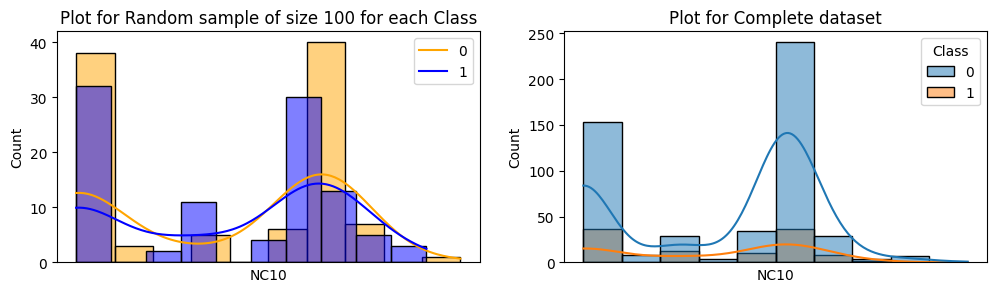

---------------------------------------------------------------------- 

Analysis for Random sample of size 100 for each Class
---------------------------------------------------------------------- 

                  Bins_Class_0  Count_Class_0      Bins_Class_1  Count_Class_1
0  (6.981999999999999, 11.809]             38   (6.986, 11.385]             32
1             (11.809, 16.587]              3   (11.385, 15.74]              0
2             (16.587, 21.365]              0   (15.74, 20.095]              2
3             (21.365, 26.144]              5   (20.095, 24.45]             11
4             (26.144, 30.922]              0   (24.45, 28.805]              0
5               (30.922, 35.7]              6   (28.805, 33.16]              4
6               (35.7, 40.479]             40   (33.16, 37.515]             30
7             (40.479, 45.257]              7  (37.515, 41.869]             13
8             (45.257, 50.035]              0  (41.869, 46.224]              5
9         

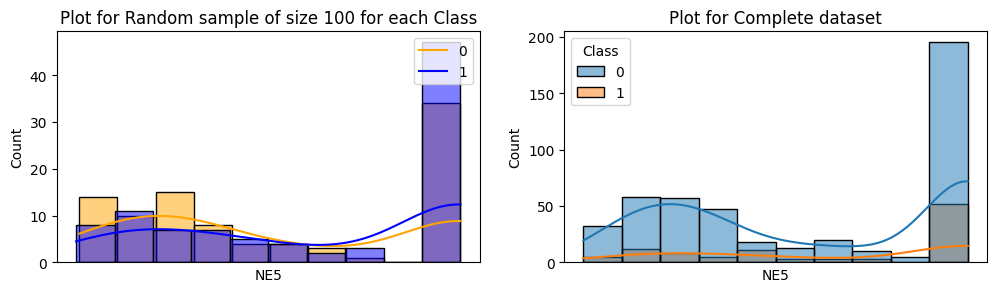

---------------------------------------------------------------------- 

Analysis for Random sample of size 100 for each Class
---------------------------------------------------------------------- 

        Bins_Class_0  Count_Class_0      Bins_Class_1  Count_Class_1
0   (11.794, 21.616]             14  (10.974, 20.878]              8
1   (21.616, 31.339]             10  (20.878, 30.683]             11
2   (31.339, 41.062]             15  (30.683, 40.489]              7
3   (41.062, 50.785]              8  (40.489, 50.294]              7
4   (50.785, 60.509]              4  (50.294, 60.099]              5
5   (60.509, 70.232]              4  (60.099, 69.904]              4
6   (70.232, 79.955]              3  (69.904, 79.709]              2
7   (79.955, 89.679]              1  (79.709, 89.515]              3
8   (89.679, 99.402]              0   (89.515, 99.32]              0
9  (99.402, 109.125]             34  (99.32, 109.125]             47
-----------------------------------------

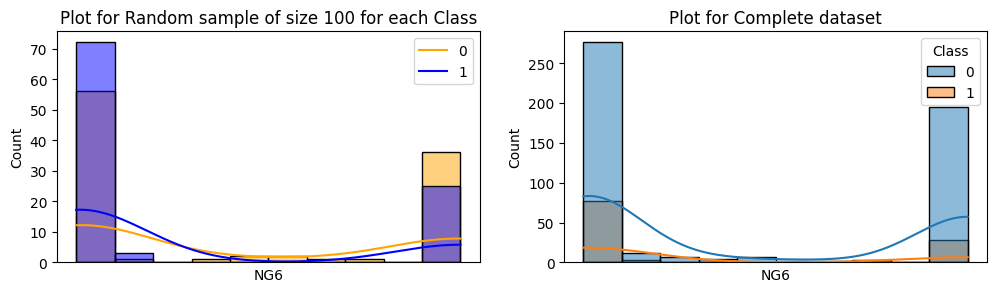

---------------------------------------------------------------------- 

Analysis for Random sample of size 100 for each Class
---------------------------------------------------------------------- 

        Bins_Class_0  Count_Class_0      Bins_Class_1  Count_Class_1
0  (-0.00316, 2.216]             56  (-0.0218, 2.199]             72
1     (2.216, 4.411]              1    (2.199, 4.397]              3
2     (4.411, 6.607]              0    (4.397, 6.594]              0
3     (6.607, 8.803]              1    (6.594, 8.792]              0
4    (8.803, 10.999]              2    (8.792, 10.99]              0
5   (10.999, 13.195]              2   (10.99, 13.187]              0
6   (13.195, 15.391]              1  (13.187, 15.385]              0
7   (15.391, 17.586]              1  (15.385, 17.583]              0
8   (17.586, 19.782]              0   (17.583, 19.78]              0
9   (19.782, 21.978]             36   (19.78, 21.978]             25
-----------------------------------------

In [31]:
for feature in ['NC10','NE5','NG6']:
    print('-'*100,'\n')
    print(f'Analysis for {feature} \n')
    print('-'*100,'\n')
    analysis_feature(feature, df_train)

> Observations:
- Beginning peak for the feature 'CW' is because of trimming the minimum value at 7.030640
- The peak at the end for the features 'EL' and 'GL' are because of trimming the max value at 109.125159  and 21.978000 respectively

#### Analysis of features after log transformation

In [32]:
df_trans = df_train.copy()

In [33]:
for feature in ['NB5','NC7','NC10','NA7','NB1','NA8','NB3','NE5','NG6']:
    df_trans[feature+'_trans'] = np.log(df_trans[feature])

In [34]:
# df_trans.columns

----------------------------------------------------------------------
Feature : NB5


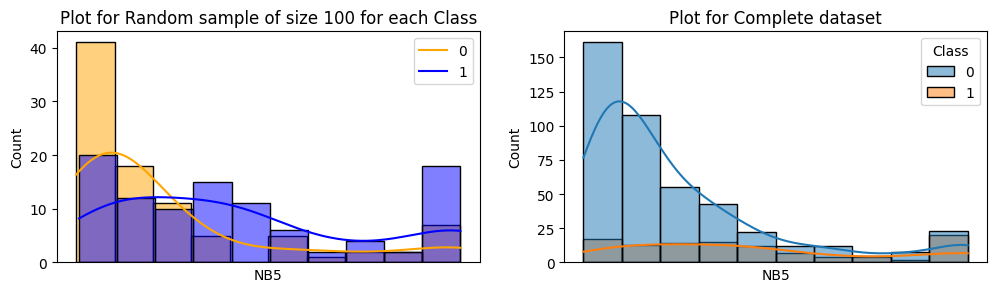

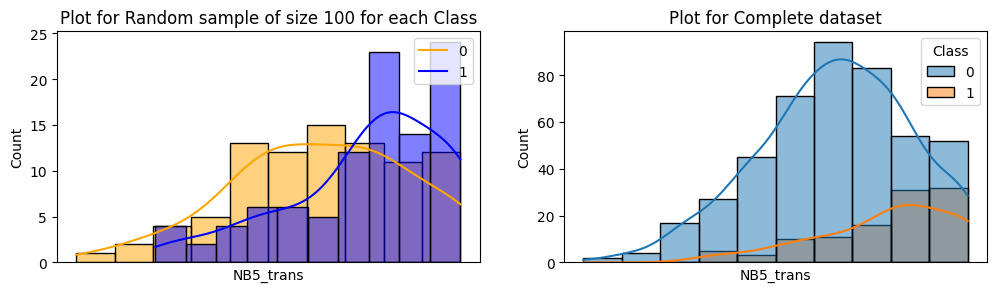

----------------------------------------------------------------------
----------------------------------------------------------------------
Feature : NC7


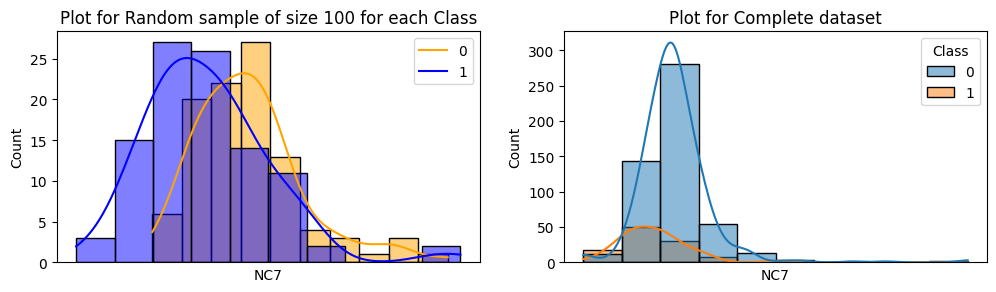

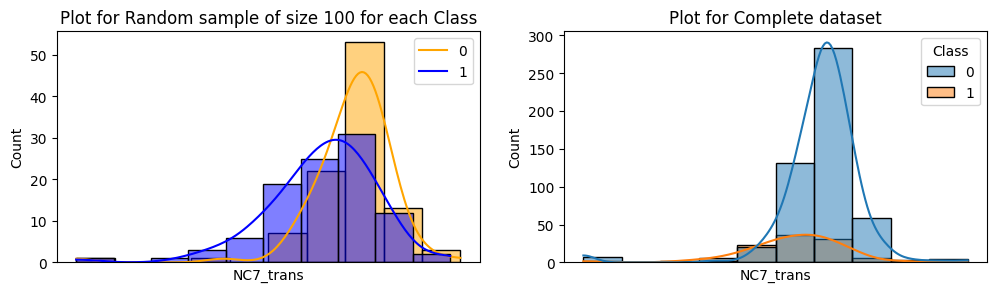

----------------------------------------------------------------------
----------------------------------------------------------------------
Feature : NC10


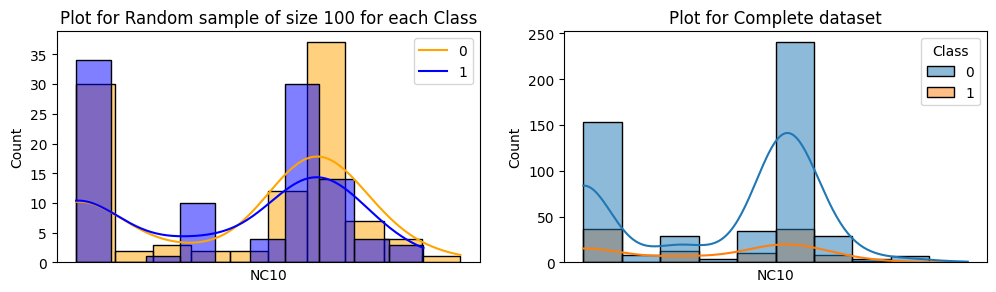

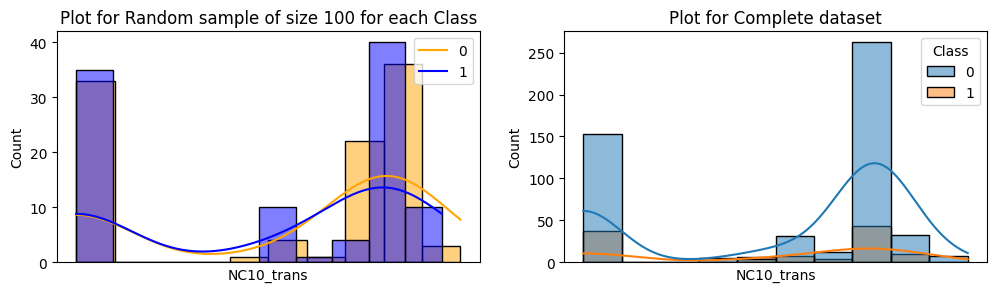

----------------------------------------------------------------------
----------------------------------------------------------------------
Feature : NA7


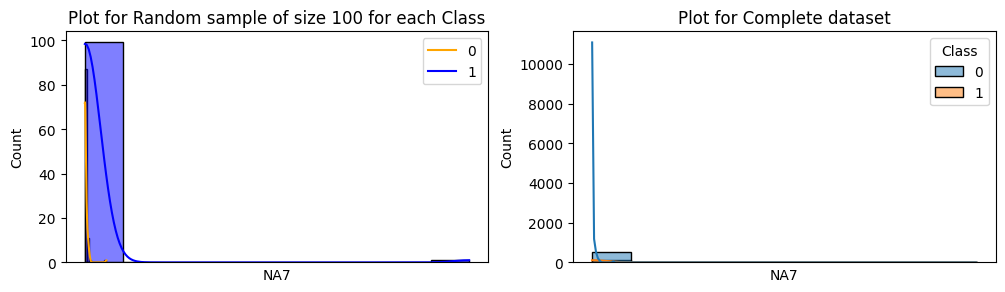

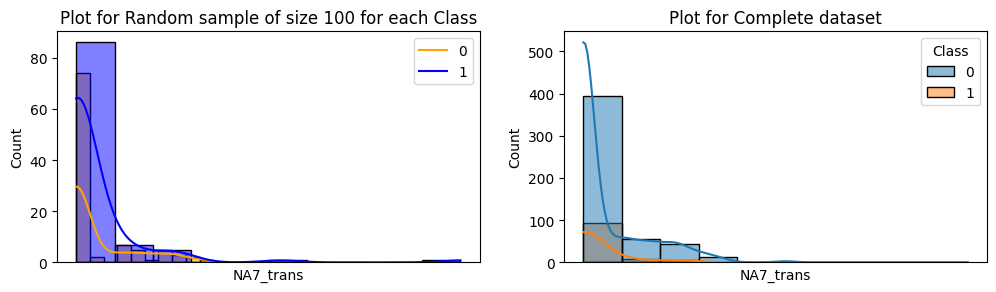

----------------------------------------------------------------------
----------------------------------------------------------------------
Feature : NB1


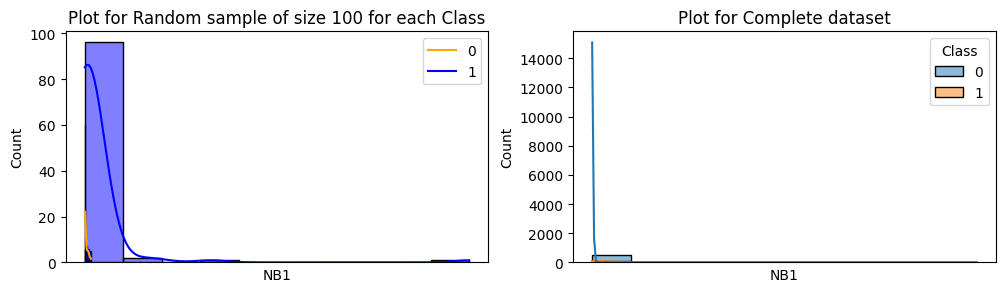

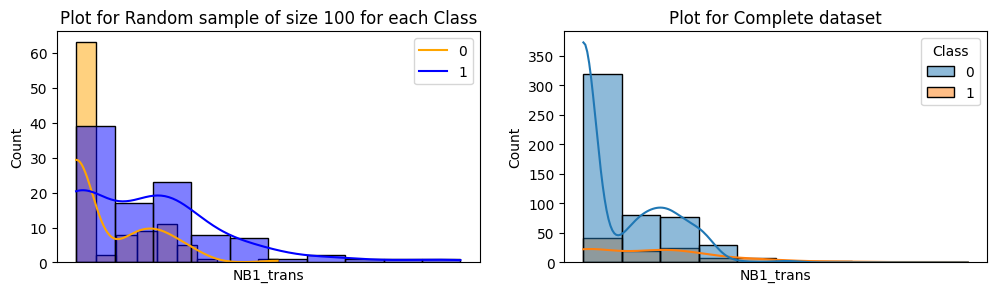

----------------------------------------------------------------------
----------------------------------------------------------------------
Feature : NA8


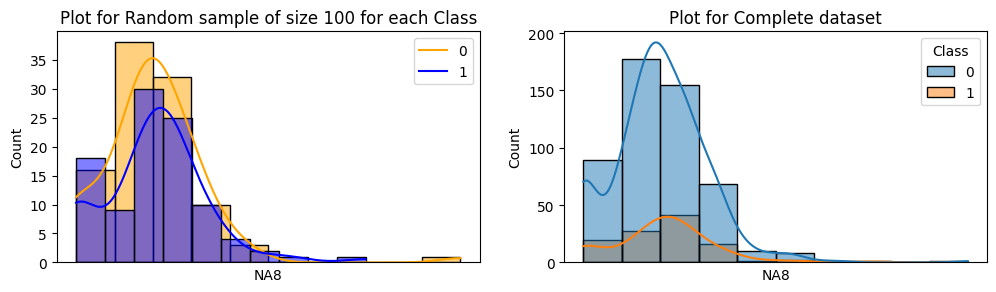

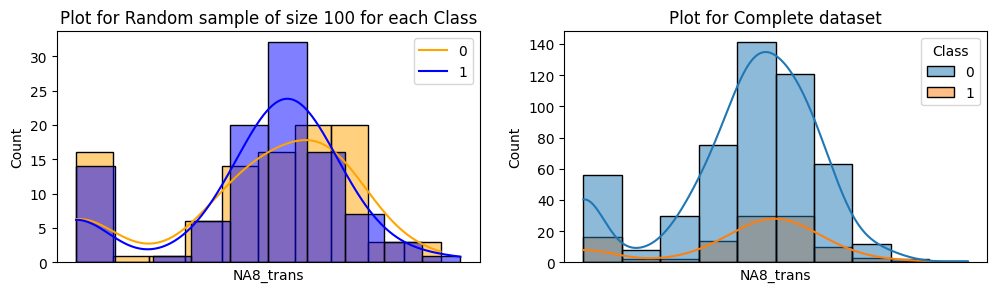

----------------------------------------------------------------------
----------------------------------------------------------------------
Feature : NB3


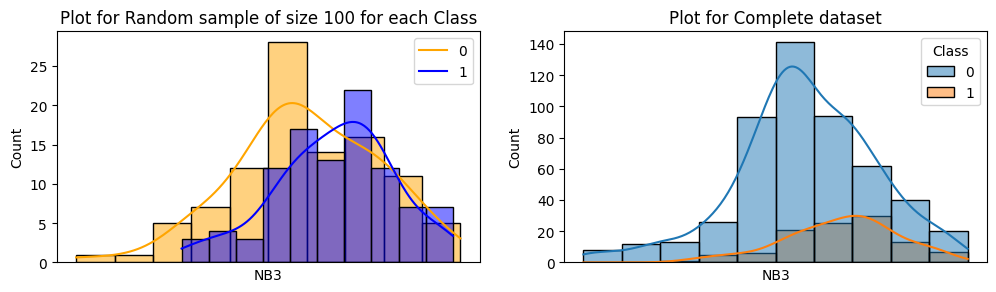

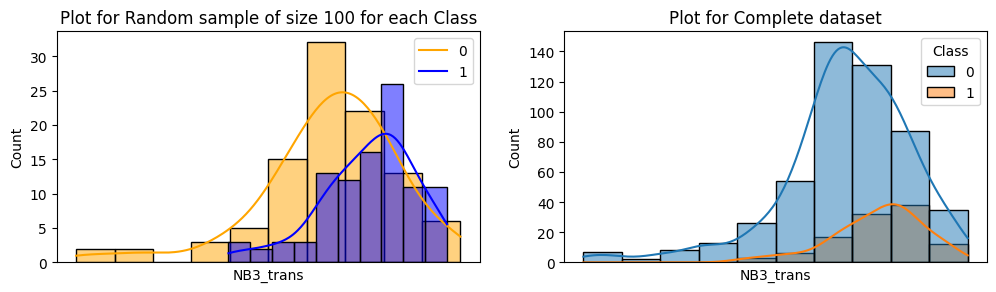

----------------------------------------------------------------------
----------------------------------------------------------------------
Feature : NE5


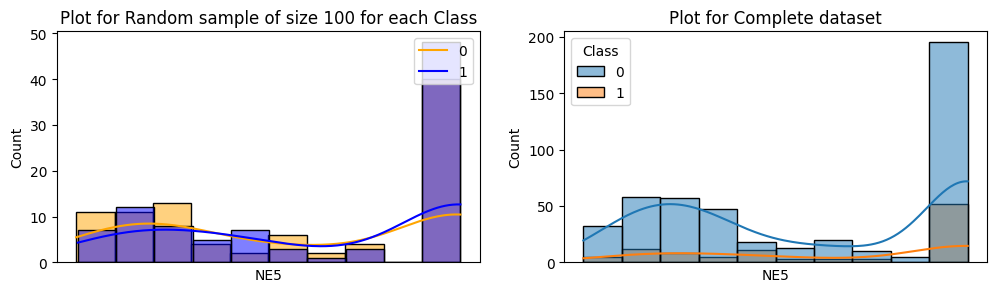

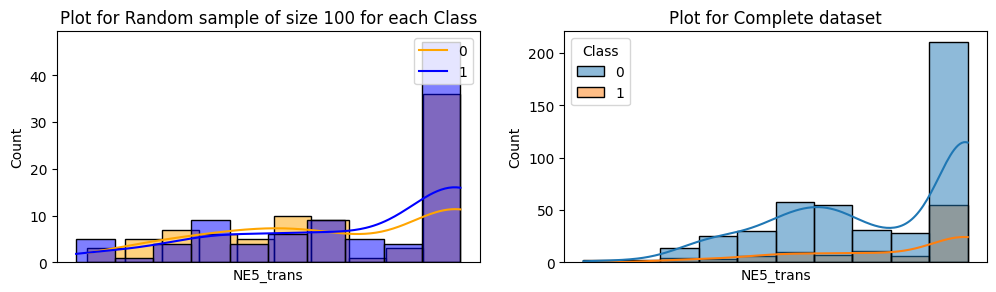

----------------------------------------------------------------------
----------------------------------------------------------------------
Feature : NG6


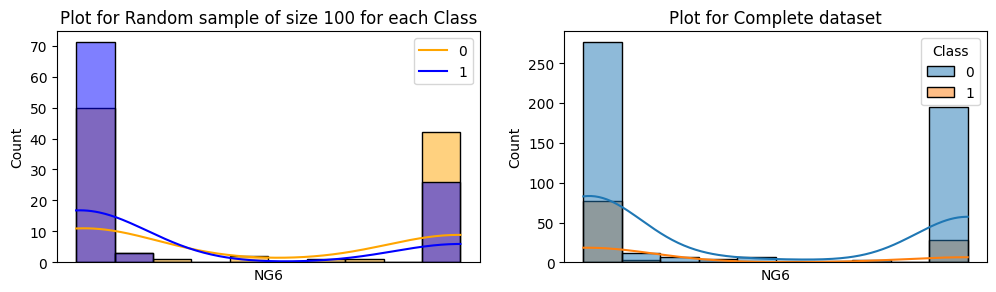

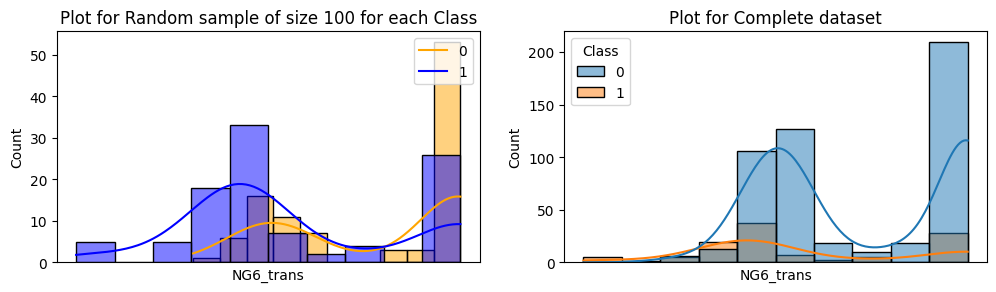

----------------------------------------------------------------------


In [35]:
for feature in ['NB5','NC7','NC10','NA7','NB1','NA8','NB3','NE5','NG6']:
    print('-'*70)
    print(f'Feature : {feature}')
    analysis_feature(feature, df_train, only_plot=True)
    analysis_feature(feature+'_trans', df_trans, only_plot=True)
    print('-'*70)

----------------------------------------------------------------------
Feature : NB5


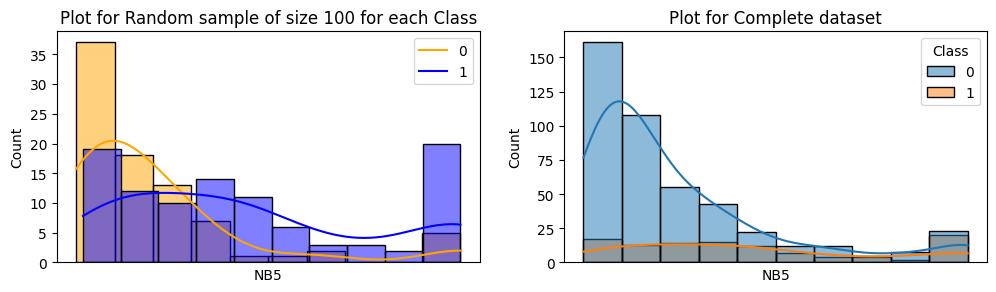

---------------------------------------------------------------------- 

Analysis for Random sample of size 100 for each Class
---------------------------------------------------------------------- 

         Bins_Class_0  Count_Class_0        Bins_Class_1  Count_Class_1
0     (0.987, 35.662]             37     (7.104, 41.163]             19
1    (35.662, 69.994]             18    (41.163, 74.883]             12
2   (69.994, 104.325]             13   (74.883, 108.603]             10
3  (104.325, 138.656]              7  (108.603, 142.323]             14
4  (138.656, 172.988]              1  (142.323, 176.043]             11
5  (172.988, 207.319]              1  (176.043, 209.763]              6
6   (207.319, 241.65]              2  (209.763, 243.484]              3
7   (241.65, 275.982]              0  (243.484, 277.204]              3
8  (275.982, 310.313]              0  (277.204, 310.924]              2
9  (310.313, 344.644]              5  (310.924, 344.644]             20
--------

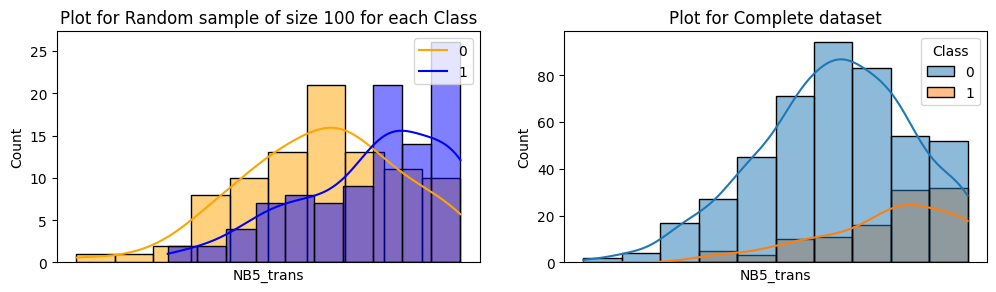

---------------------------------------------------------------------- 

Analysis for Random sample of size 100 for each Class
---------------------------------------------------------------------- 

     Bins_Class_0  Count_Class_0                 Bins_Class_1  Count_Class_1
0   (0.801, 1.31]              1  (2.0020000000000002, 2.391]              2
1   (1.31, 1.814]              1               (2.391, 2.774]              2
2  (1.814, 2.317]              2               (2.774, 3.158]              4
3  (2.317, 2.821]              8               (3.158, 3.541]              7
4  (2.821, 3.325]             10               (3.541, 3.925]              8
5  (3.325, 3.828]             13               (3.925, 4.308]              7
6  (3.828, 4.332]             21               (4.308, 4.692]              9
7  (4.332, 4.835]             13               (4.692, 5.075]             21
8  (4.835, 5.339]             11               (5.075, 5.459]             14
9  (5.339, 5.843]             

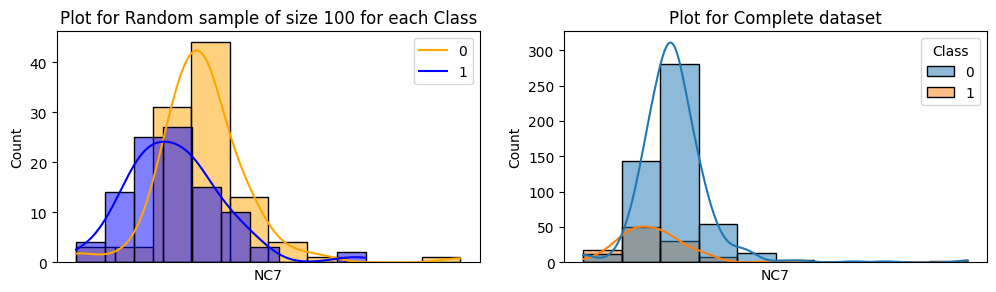

---------------------------------------------------------------------- 

Analysis for Random sample of size 100 for each Class
---------------------------------------------------------------------- 

      Bins_Class_0  Count_Class_0     Bins_Class_1  Count_Class_1
0  (0.0661, 0.277]              3  (0.0667, 0.226]              4
1   (0.277, 0.485]              3   (0.226, 0.382]             14
2   (0.485, 0.693]             31   (0.382, 0.539]             25
3     (0.693, 0.9]             44   (0.539, 0.695]             27
4     (0.9, 1.108]             13   (0.695, 0.852]             15
5   (1.108, 1.316]              4   (0.852, 1.008]             10
6   (1.316, 1.524]              1   (1.008, 1.165]              3
7   (1.524, 1.732]              0   (1.165, 1.321]              0
8   (1.732, 1.939]              0   (1.321, 1.478]              0
9   (1.939, 2.147]              1   (1.478, 1.634]              2
---------------------------------------------------------------------- 

A

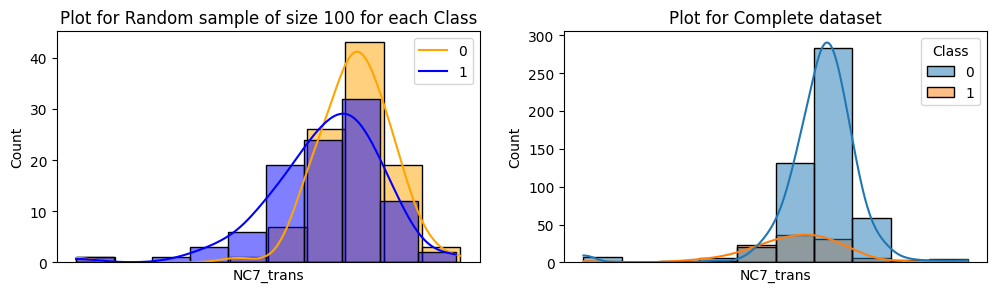

---------------------------------------------------------------------- 

Analysis for Random sample of size 100 for each Class
---------------------------------------------------------------------- 

       Bins_Class_0  Count_Class_0      Bins_Class_1  Count_Class_1
0   (-2.675, -2.35]              1  (-2.675, -2.354]              1
1   (-2.35, -2.031]              0  (-2.354, -2.038]              0
2  (-2.031, -1.711]              0  (-2.038, -1.722]              1
3  (-1.711, -1.391]              0  (-1.722, -1.406]              3
4  (-1.391, -1.071]              1   (-1.406, -1.09]              6
5  (-1.071, -0.751]              7   (-1.09, -0.773]             19
6  (-0.751, -0.431]             26  (-0.773, -0.457]             24
7  (-0.431, -0.111]             43  (-0.457, -0.141]             32
8   (-0.111, 0.209]             19   (-0.141, 0.175]             12
9    (0.209, 0.529]              3    (0.175, 0.491]              2
----------------------------------------------------

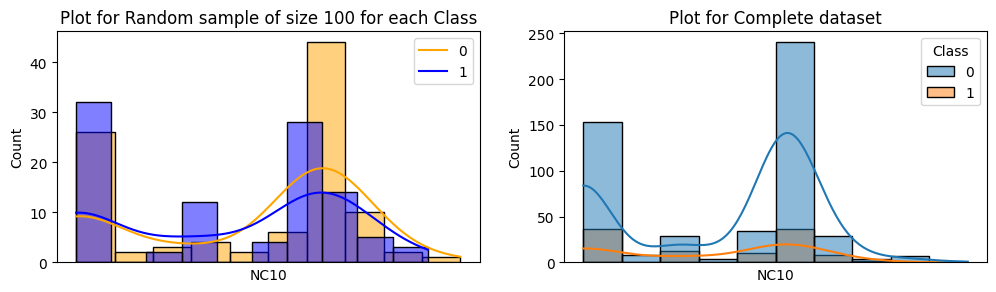

---------------------------------------------------------------------- 

Analysis for Random sample of size 100 for each Class
---------------------------------------------------------------------- 

                 Bins_Class_0  Count_Class_0      Bins_Class_1  Count_Class_1
0  (6.981999999999999, 11.79]             26   (6.986, 11.385]             32
1              (11.79, 16.55]              2   (11.385, 15.74]              0
2             (16.55, 21.309]              3   (15.74, 20.095]              2
3            (21.309, 26.068]              4   (20.095, 24.45]             12
4            (26.068, 30.828]              2   (24.45, 28.805]              0
5            (30.828, 35.587]              6   (28.805, 33.16]              4
6            (35.587, 40.347]             44   (33.16, 37.515]             28
7            (40.347, 45.106]             10  (37.515, 41.869]             14
8            (45.106, 49.866]              2  (41.869, 46.224]              5
9            (49.866

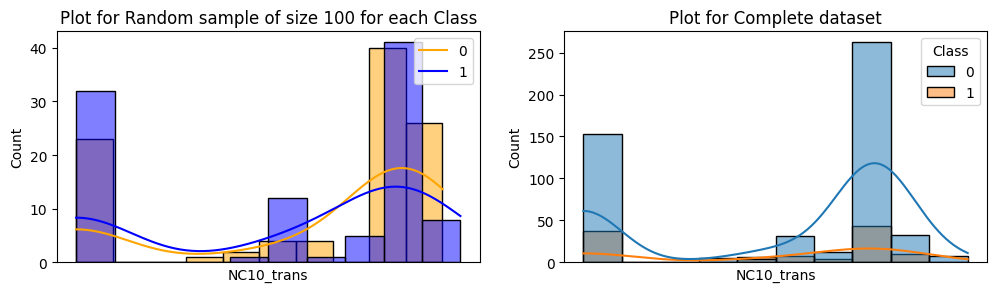

---------------------------------------------------------------------- 

Analysis for Random sample of size 100 for each Class
---------------------------------------------------------------------- 

     Bins_Class_0  Count_Class_0    Bins_Class_1  Count_Class_1
0  (1.947, 2.138]             23  (1.947, 2.148]             32
1  (2.138, 2.327]              0  (2.148, 2.345]              0
2  (2.327, 2.515]              0  (2.345, 2.542]              0
3  (2.515, 2.703]              1   (2.542, 2.74]              0
4  (2.703, 2.891]              2   (2.74, 2.937]              1
5  (2.891, 3.079]              4  (2.937, 3.134]             12
6  (3.079, 3.267]              4  (3.134, 3.332]              1
7  (3.267, 3.455]              0  (3.332, 3.529]              5
8  (3.455, 3.643]             40  (3.529, 3.726]             41
9  (3.643, 3.831]             26  (3.726, 3.924]              8
---------------------------------------------------------------------- 

Analysis for Complete d

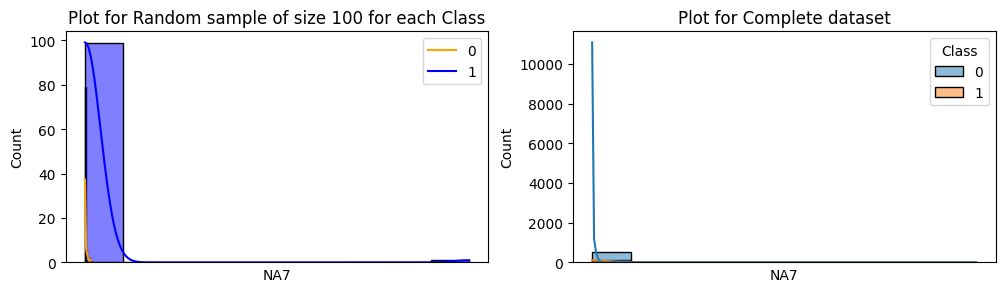

---------------------------------------------------------------------- 

Analysis for Random sample of size 100 for each Class
---------------------------------------------------------------------- 

                     Bins_Class_0  Count_Class_0     Bins_Class_1  Count_Class_1
0  (0.024399999999999998, 0.0427]             79  (0.0143, 1.055]             99
1                (0.0427, 0.0599]              4   (1.055, 2.084]              0
2                 (0.0599, 0.077]              5   (2.084, 3.113]              0
3                 (0.077, 0.0942]              4   (3.113, 4.142]              0
4                 (0.0942, 0.111]              3   (4.142, 5.171]              0
5                  (0.111, 0.128]              1     (5.171, 6.2]              0
6                  (0.128, 0.146]              0     (6.2, 7.229]              0
7                  (0.146, 0.163]              1   (7.229, 8.258]              0
8                   (0.163, 0.18]              1   (8.258, 9.287]      

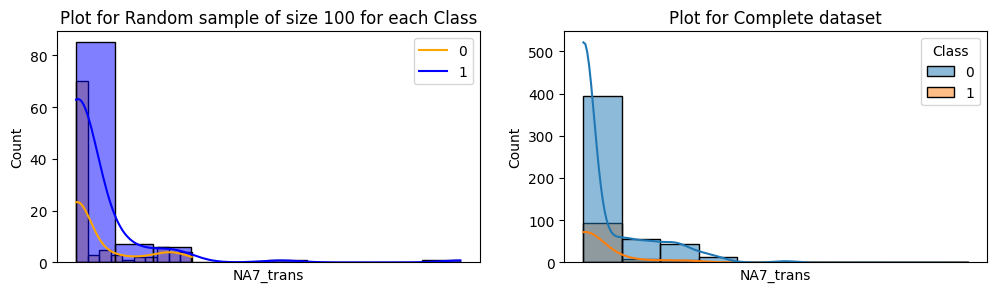

---------------------------------------------------------------------- 

Analysis for Random sample of size 100 for each Class
---------------------------------------------------------------------- 

       Bins_Class_0  Count_Class_0       Bins_Class_1  Count_Class_1
0  (-3.669, -3.486]             70   (-3.673, -3.066]             85
1  (-3.486, -3.305]              3   (-3.066, -2.466]              7
2  (-3.305, -3.125]              5   (-2.466, -1.866]              6
3  (-3.125, -2.945]              3   (-1.866, -1.266]              0
4  (-2.945, -2.764]              1   (-1.266, -0.666]              0
5  (-2.764, -2.584]              2  (-0.666, -0.0662]              1
6  (-2.584, -2.404]              2   (-0.0662, 0.534]              0
7  (-2.404, -2.223]              6     (0.534, 1.134]              0
8  (-2.223, -2.043]              4     (1.134, 1.734]              0
9  (-2.043, -1.862]              4     (1.734, 2.334]              1
-----------------------------------------

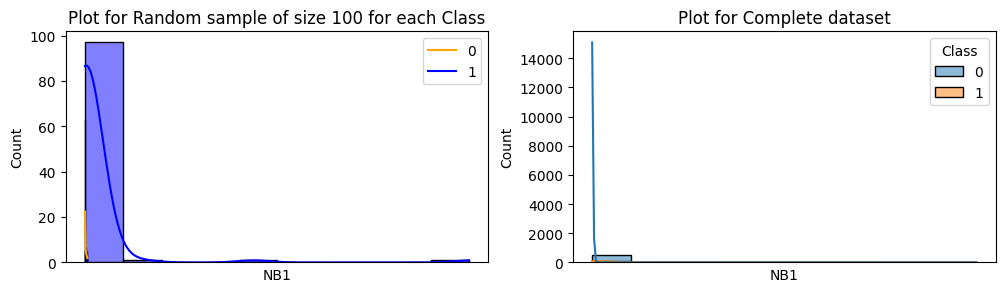

---------------------------------------------------------------------- 

Analysis for Random sample of size 100 for each Class
---------------------------------------------------------------------- 

      Bins_Class_0  Count_Class_0          Bins_Class_1  Count_Class_1
0   (1.219, 2.183]             63     (-0.234, 147.476]             97
1   (2.183, 3.135]              6    (147.476, 293.723]              1
2   (3.135, 4.088]              5    (293.723, 439.969]              0
3    (4.088, 5.04]              4    (439.969, 586.215]              0
4    (5.04, 5.993]              7    (586.215, 732.462]              1
5   (5.993, 6.946]              2    (732.462, 878.708]              0
6   (6.946, 7.898]              2   (878.708, 1024.954]              0
7   (7.898, 8.851]              5  (1024.954, 1171.201]              0
8   (8.851, 9.804]              2  (1171.201, 1317.447]              0
9  (9.804, 10.756]              4  (1317.447, 1463.693]              1
-------------------

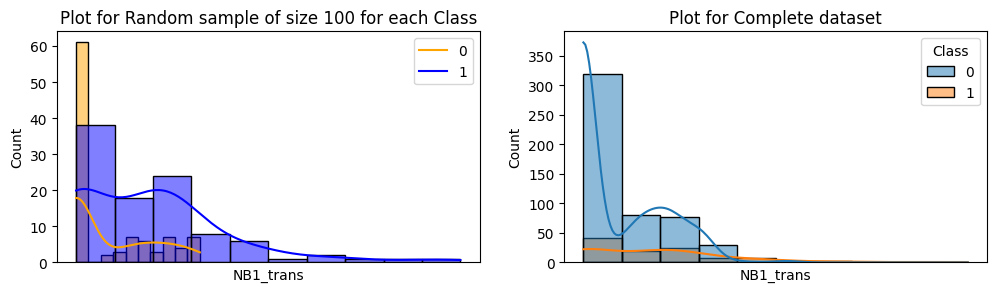

---------------------------------------------------------------------- 

Analysis for Random sample of size 100 for each Class
---------------------------------------------------------------------- 

     Bins_Class_0  Count_Class_0    Bins_Class_1  Count_Class_1
0  (0.204, 0.435]             61  (0.199, 0.915]             38
1  (0.435, 0.663]              0  (0.915, 1.623]             18
2  (0.663, 0.891]              2  (1.623, 2.331]             24
3  (0.891, 1.119]              3   (2.331, 3.04]              8
4  (1.119, 1.347]              7   (3.04, 3.748]              6
5  (1.347, 1.575]              6  (3.748, 4.456]              1
6  (1.575, 1.803]              3  (4.456, 5.164]              2
7  (1.803, 2.031]              7  (5.164, 5.872]              1
8  (2.031, 2.259]              4  (5.872, 6.581]              1
9  (2.259, 2.487]              7  (6.581, 7.289]              1
---------------------------------------------------------------------- 

Analysis for Complete d

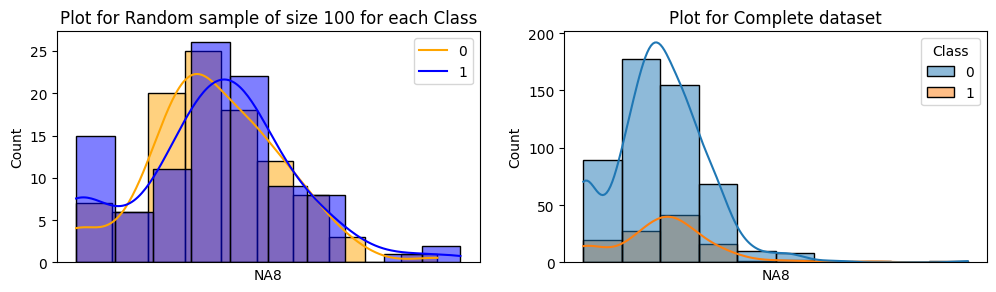

---------------------------------------------------------------------- 

Analysis for Random sample of size 100 for each Class
---------------------------------------------------------------------- 

                  Bins_Class_0  Count_Class_0      Bins_Class_1  Count_Class_1
0  (3.3770000000000002, 5.299]              7     (3.376, 5.42]             15
1               (5.299, 7.201]              6     (5.42, 7.443]              6
2               (7.201, 9.103]             20    (7.443, 9.466]             11
3              (9.103, 11.005]             25   (9.466, 11.489]             26
4             (11.005, 12.906]             18  (11.489, 13.511]             22
5             (12.906, 14.808]             12  (13.511, 15.534]              9
6              (14.808, 16.71]              8  (15.534, 17.557]              8
7              (16.71, 18.612]              3   (17.557, 19.58]              0
8             (18.612, 20.514]              0   (19.58, 21.603]              1
9         

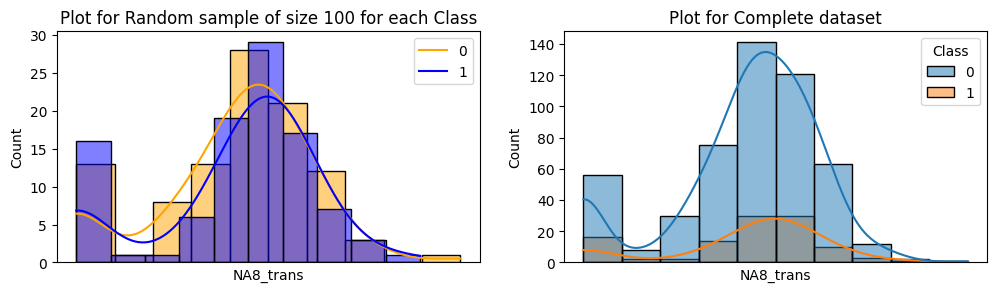

---------------------------------------------------------------------- 

Analysis for Random sample of size 100 for each Class
---------------------------------------------------------------------- 

     Bins_Class_0  Count_Class_0                 Bins_Class_1  Count_Class_1
0  (1.219, 1.467]             13  (1.2200000000000002, 1.441]             16
1  (1.467, 1.711]              1                (1.441, 1.66]              1
2  (1.711, 1.955]              8                (1.66, 1.878]              1
3  (1.955, 2.199]             13               (1.878, 2.097]              6
4  (2.199, 2.443]             28               (2.097, 2.315]             19
5  (2.443, 2.687]             21               (2.315, 2.534]             29
6  (2.687, 2.931]             12               (2.534, 2.752]             17
7  (2.931, 3.175]              3               (2.752, 2.971]              7
8  (3.175, 3.419]              0               (2.971, 3.189]              3
9  (3.419, 3.663]             

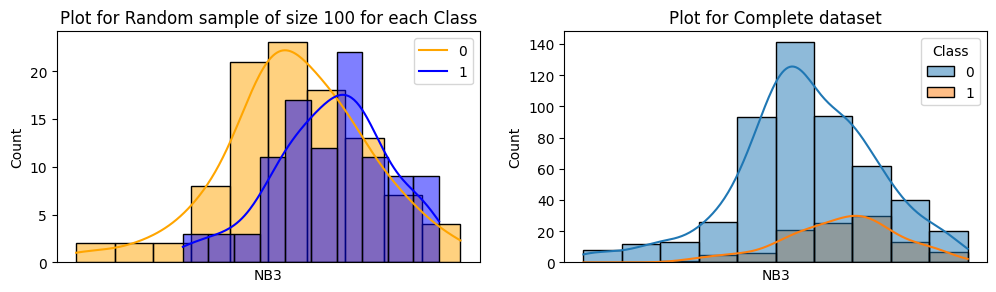

---------------------------------------------------------------------- 

Analysis for Random sample of size 100 for each Class
---------------------------------------------------------------------- 

       Bins_Class_0  Count_Class_0      Bins_Class_1  Count_Class_1
0   (10.22, 12.147]              2  (15.523, 16.808]              3
1  (12.147, 14.053]              2  (16.808, 18.079]              3
2   (14.053, 15.96]              2   (18.079, 19.35]              3
3   (15.96, 17.867]              8   (19.35, 20.621]             11
4  (17.867, 19.774]             21  (20.621, 21.892]             17
5   (19.774, 21.68]             23  (21.892, 23.163]             12
6   (21.68, 23.587]             18  (23.163, 24.435]             22
7  (23.587, 25.494]             13  (24.435, 25.706]             11
8  (25.494, 27.401]              7  (25.706, 26.977]              9
9  (27.401, 29.307]              4  (26.977, 28.248]              9
----------------------------------------------------

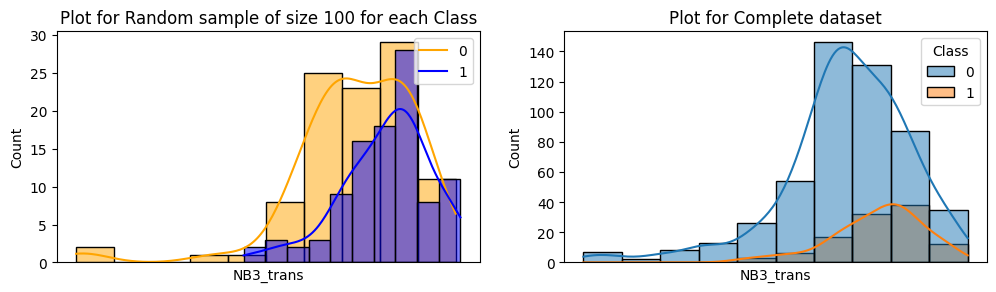

---------------------------------------------------------------------- 

Analysis for Random sample of size 100 for each Class
---------------------------------------------------------------------- 

     Bins_Class_0  Count_Class_0    Bins_Class_1  Count_Class_1
0  (2.289, 2.394]              2  (2.742, 2.802]              2
1  (2.394, 2.496]              0   (2.802, 2.86]              3
2  (2.496, 2.599]              0   (2.86, 2.919]              2
3  (2.599, 2.701]              1  (2.919, 2.977]              3
4  (2.701, 2.803]              1  (2.977, 3.036]              9
5  (2.803, 2.906]              8  (3.036, 3.094]             16
6  (2.906, 3.008]             25  (3.094, 3.153]             18
7  (3.008, 3.111]             23  (3.153, 3.211]             28
8  (3.111, 3.213]             29   (3.211, 3.27]              8
9  (3.213, 3.316]             11   (3.27, 3.328]             11
---------------------------------------------------------------------- 

Analysis for Complete d

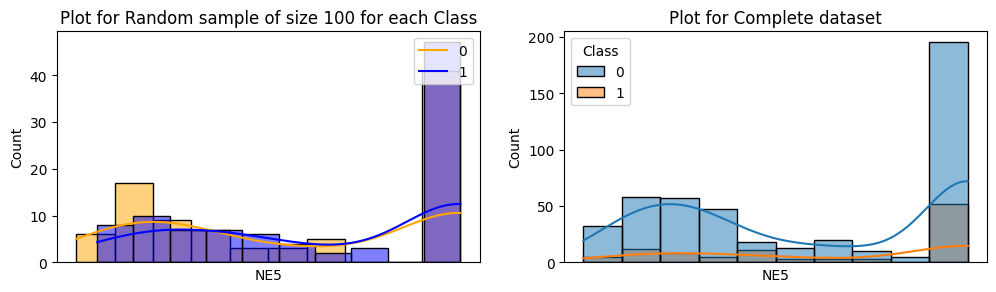

---------------------------------------------------------------------- 

Analysis for Random sample of size 100 for each Class
---------------------------------------------------------------------- 

        Bins_Class_0  Count_Class_0      Bins_Class_1  Count_Class_1
0     (5.29, 15.768]              6  (10.974, 20.878]              8
1   (15.768, 26.141]             17  (20.878, 30.683]             10
2   (26.141, 36.514]              9  (30.683, 40.489]              7
3   (36.514, 46.887]              7  (40.489, 50.294]              7
4    (46.887, 57.26]              3  (50.294, 60.099]              6
5    (57.26, 67.633]              3  (60.099, 69.904]              4
6   (67.633, 78.006]              5  (69.904, 79.709]              2
7   (78.006, 88.379]              0  (79.709, 89.515]              3
8   (88.379, 98.752]              0   (89.515, 99.32]              0
9  (98.752, 109.125]             41  (99.32, 109.125]             47
-----------------------------------------

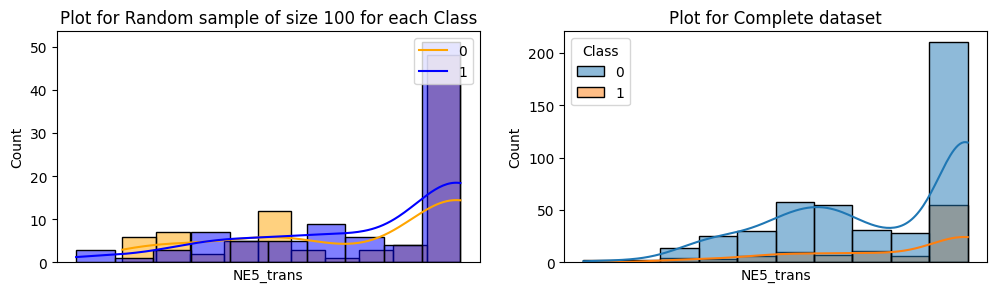

---------------------------------------------------------------------- 

Analysis for Random sample of size 100 for each Class
---------------------------------------------------------------------- 

     Bins_Class_0  Count_Class_0                 Bins_Class_1  Count_Class_1
0  (2.677, 2.881]              6  (2.4010000000000002, 2.633]              3
1  (2.881, 3.082]              7               (2.633, 2.862]              1
2  (3.082, 3.284]              2               (2.862, 3.091]              3
3  (3.284, 3.485]              5                (3.091, 3.32]              7
4  (3.485, 3.686]             12                (3.32, 3.548]              5
5  (3.686, 3.887]              3               (3.548, 3.777]              5
6  (3.887, 4.089]              1               (3.777, 4.006]              9
7   (4.089, 4.29]              3               (4.006, 4.235]              6
8   (4.29, 4.491]              4               (4.235, 4.464]              4
9  (4.491, 4.692]             

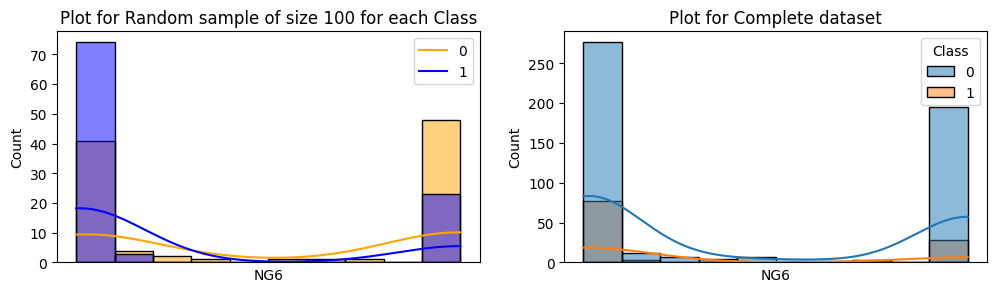

---------------------------------------------------------------------- 

Analysis for Random sample of size 100 for each Class
---------------------------------------------------------------------- 

       Bins_Class_0  Count_Class_0      Bins_Class_1  Count_Class_1
0  (-0.0156, 2.204]             41  (-0.0218, 2.199]             74
1    (2.204, 4.401]              4    (2.199, 4.397]              3
2    (4.401, 6.599]              2    (4.397, 6.594]              0
3    (6.599, 8.796]              1    (6.594, 8.792]              0
4   (8.796, 10.993]              0    (8.792, 10.99]              0
5   (10.993, 13.19]              1   (10.99, 13.187]              0
6   (13.19, 15.387]              1  (13.187, 15.385]              0
7  (15.387, 17.584]              1  (15.385, 17.583]              0
8  (17.584, 19.781]              0   (17.583, 19.78]              0
9  (19.781, 21.978]             48   (19.78, 21.978]             23
----------------------------------------------------

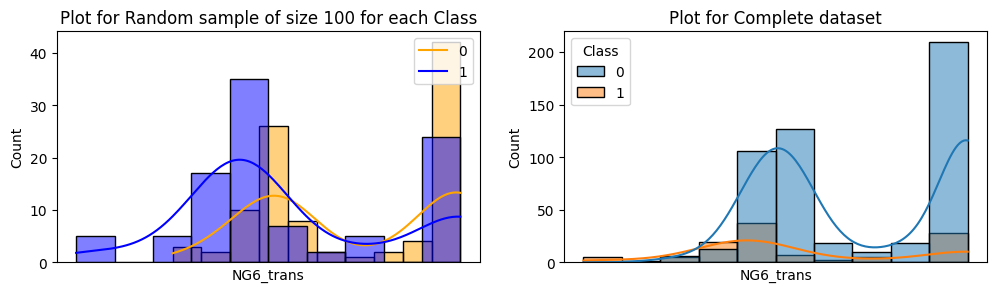

---------------------------------------------------------------------- 

Analysis for Random sample of size 100 for each Class
---------------------------------------------------------------------- 

                   Bins_Class_0  Count_Class_0                  Bins_Class_1  Count_Class_1
0  (-4.313000000000001, -3.566]              3  (-6.797000000000001, -5.799]              5
1              (-3.566, -2.826]              2              (-5.799, -4.811]              0
2              (-2.826, -2.087]             10              (-4.811, -3.823]              5
3              (-2.087, -1.347]             26              (-3.823, -2.836]             17
4              (-1.347, -0.608]              8              (-2.836, -1.848]             35
5               (-0.608, 0.132]              2               (-1.848, -0.86]              7
6                (0.132, 0.872]              1                (-0.86, 0.127]              2
7                (0.872, 1.611]              2                (0

In [36]:
for feature in ['NB5','NC7','NC10','NA7','NB1','NA8','NB3','NE5','NG6']:
    print('-'*70)
    print(f'Feature : {feature}')
    analysis_feature(feature, df_train, only_plot=False)
    analysis_feature(feature+'_trans', df_trans, only_plot=False)
    print('-'*70)

> Observations:

- **NB5**:<br>
-- After log transformation, the lower range values assume to acquire a more of normal distribution. However, it looks skewed to the left as the endmax value is trimmed.<br>
-- Remove max trim and check

- **NC7**:<br>
-- Remove min trimming

- **NC10**:<br>
-- Remove min trim
-- Imputing values at lower end may help after taking log transformation

- **NA7**:<br>
-- Ignore feature as most of the numbers at lower end are trimmed.

- **NB1**:<br>
-- Ignore feature as most of the numbers at lower end are trimmed.

- **NA8**:<br>
-- Imputing values at lower end may help after taking log transformation

- **NB3**:<br>
-- No change observed after log transformation

- **CW**:<br>
-- Imputing values at lower end may help after taking log transformation

- **NE5**, **NG6**:<br>
-- Remove max_trim + log transformation may help



### TSNE plot

* We'll create a TSNE plot to get a general idea about clusters in the data. For this, we have to treate missing values.
* For this plot, we shall treat the null values by knn-imputer.

In [37]:
null_cols = ['NE5','NB5','NC2','NF7','NC1','NG6','NF1','ND8','NF5',]

imputer = KNNImputer(n_neighbors=3)

df_no_null = pd.DataFrame(imputer.fit_transform(df_num), columns=num_cols)

In [38]:
df_no_null.isnull().sum().sum()

0

In [39]:
from sklearn.preprocessing import StandardScaler
 
std_df = StandardScaler().fit_transform(df_no_null)
print(std_df.shape)

(617, 55)


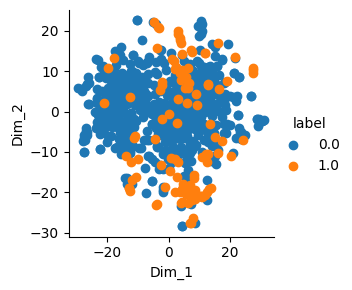

In [40]:
from sklearn.manifold import TSNE
model = TSNE(n_components = 2, random_state = 42)
 
tsne_data = model.fit_transform(std_df)
 
# creating a new data frame to plot the result data
tsne_data = np.vstack((tsne_data.T, df_train.Class)).T
tsne_df = pd.DataFrame(data = tsne_data,
     columns =('Dim_1', 'Dim_2', 'label'))
 
# Plotting the result of tsne
sns.FacetGrid(tsne_df, hue ='label').map(
       plt.scatter, 'Dim_1', 'Dim_2').add_legend()
 
plt.show()

### Correlation between features

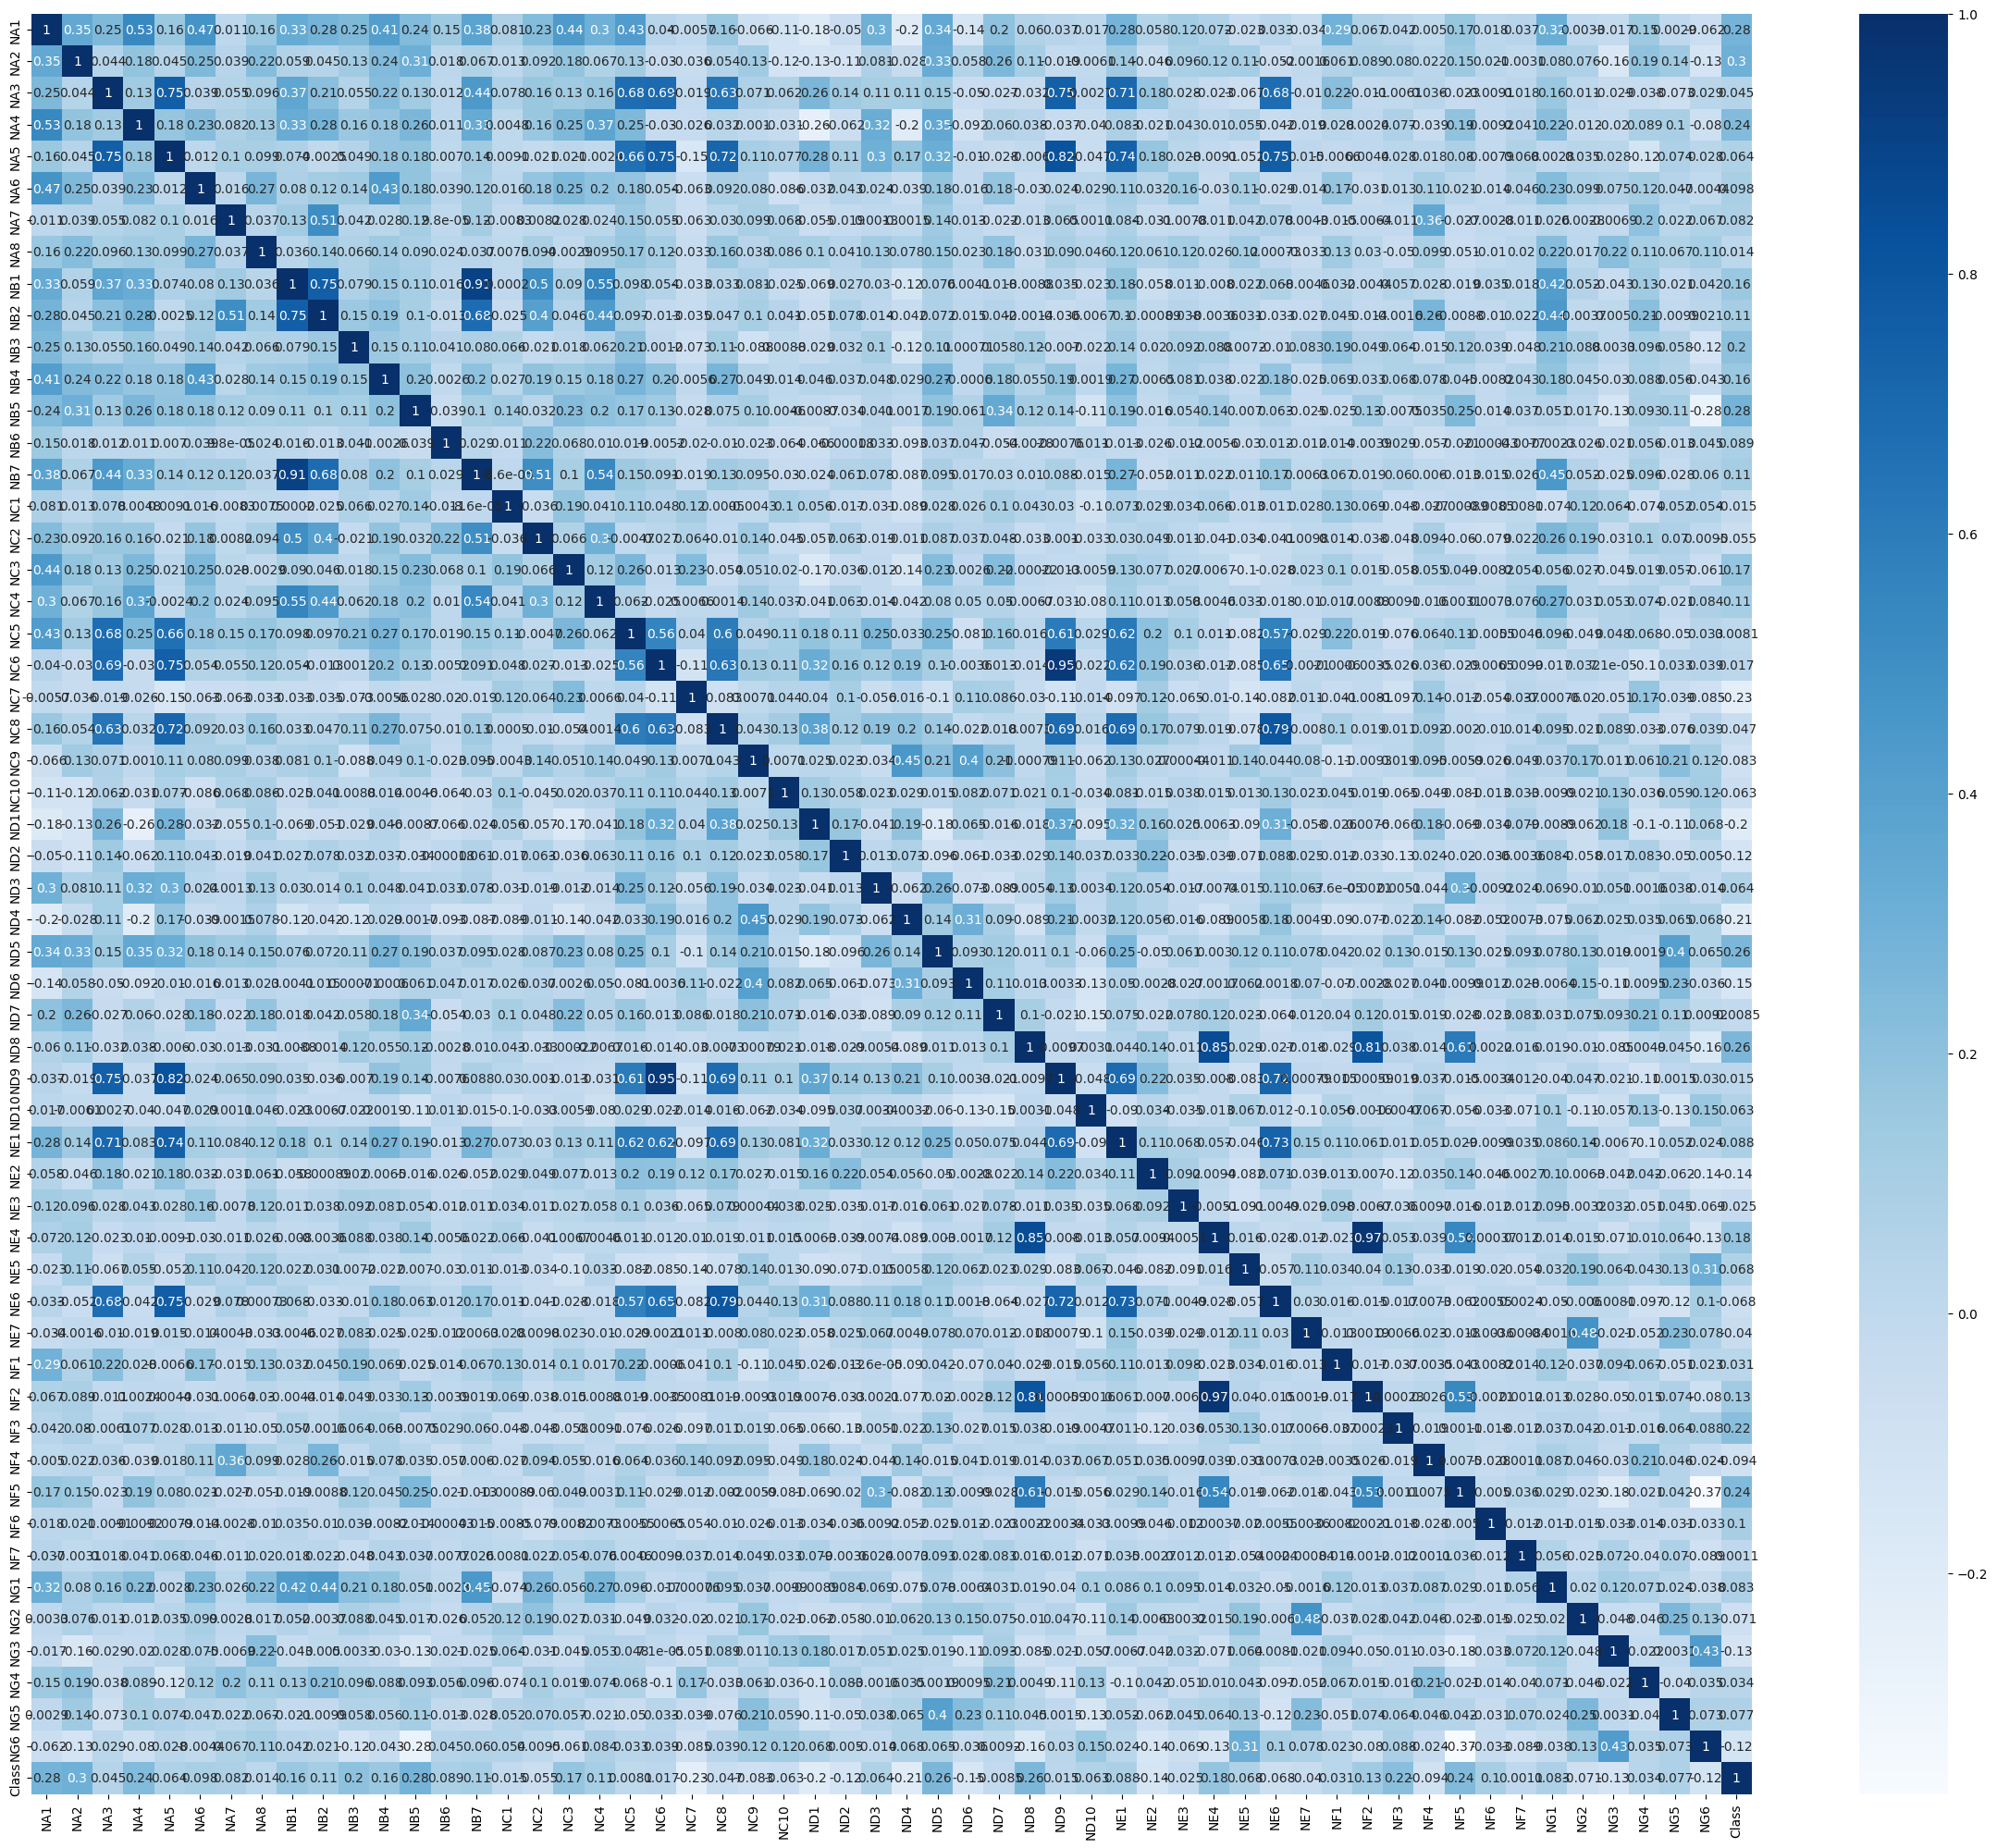

In [41]:
correlations= df_train.corr(numeric_only=True)
plt.rcParams['figure.figsize'] = (30, 25)
sns.heatmap(correlations, annot=True,cbar=True,cmap='Blues')
plt.show()

* Highest Correlation among features

In [42]:
corr = correlations.abs().unstack().sort_values(kind='quicksort', ascending=False)
corr[(corr > 0.8) & (corr < 1)]

NE4  NF2    0.971152
NF2  NE4    0.971152
NC6  ND9    0.948991
ND9  NC6    0.948991
NB1  NB7    0.907981
NB7  NB1    0.907981
ND8  NE4    0.850957
NE4  ND8    0.850957
NA5  ND9    0.823012
ND9  NA5    0.823012
NF2  ND8    0.805989
ND8  NF2    0.805989
dtype: float64

In [43]:
correlations[(correlations.Class > -0.05) & (correlations.Class < 0)].Class.sort_values().index

Index(['NC8', 'NE7', 'NE3', 'NC1', 'ND7'], dtype='object')

In [44]:
correlations[(correlations.Class > 0) & (correlations.Class < 0.05)].Class.sort_values().index

Index(['NF7', 'NC5', 'NA8', 'ND9', 'NC6', 'NF1', 'NG4', 'NA3'], dtype='object')